## Build MRCNN Model -Load MRCNN and FCN weights - Load Training Files  

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle, warnings, platform
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib          import cm
import mrcnn.utils       as utils
import mrcnn.visualize   as visualize
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_fcn_training_pipeline, run_mrcnn_training_pipeline
from mrcnn.prep_notebook import build_fcn_inference_pipeline, build_mrcnn_inference_pipeline
from mrcnn.prep_notebook import run_mrcnn_detection
from mrcnn.visualize     import display_training_batch
from mrcnn.prep_notebook import get_inference_batch, get_image_batch, run_mrcnn_detection, run_fcn_detection
from mrcnn.coco          import prep_coco_dataset
from mrcnn.newshapes     import prep_newshape_dataset
warnings.filterwarnings('ignore', '.*output shape of zoom.*')

syst = platform.system()

if syst == 'Windows':
    # DIR_WEIGHTS =  'F:/models_coco/train_fcn8L2_BCE_subset/fcn20190123T0000' 
    save_path = "E:/git_projs/mrcnn3/train_coco/average_heatmaps"   
    DIR_WEIGHTS =  'F:/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000' 
elif syst == 'Linux':
    save_path = "/home/kbardool/git_projs/mrcnn3/train_coco/average_heatmaps"   
    DIR_WEIGHTS =  '/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000' 
else :
    raise Error('unrecognized system ')
print(save_path)    

CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 
EXT_ACTIVE_CLASSES = [10, 11, 13, 14, 15, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 78, 79, 80, 81, 82]
CLASS_IDS     = [10, 11, 12, 13, 14, 
                 30, 31, 32, 33, 34, 
                 35, 36, 37, 38, 39, 
                 40, 41, 42, 43, 44, 
                 45, 46, 69, 70, 71, 
                 72, 73]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current working dir:  E:\git_projs\MRCNN3\notebooks
E:/git_projs/mrcnn3/train_coco/average_heatmaps


In [2]:
# WEIGHT_FILE = 'F:/models/train_fcn8_coco_adam/fcn20181109T0000/fcn_2298.h5' 
# FCN_WEIGHT_FILE = 'F:\\models_newshapes\\train_fcn8_l2_newshapes\\fcn20181224T0000\\fcn_0821.h5'
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco_subset "
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE_subset " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8l2 " 
input_parms +=" --sysout         screen "
input_parms +=" --scale_factor   4"
# input_parms +=" --coco_classes  
input_parms +=" --coco_classes   10 11 13 14 15 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 50 51 78 79 80 81 82  "

args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [10, 11, 13, 14, 15, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 78, 79, 80, 81, 82]
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE_subset
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_coco_subset
   mrcnn_model                    last
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   4
   steps_in_epoch                 1
   sysout                         SCREEN
   val_ste

In [3]:
mrcnn_model, fcn_model = build_fcn_inference_pipeline(args = args)
# mrcnn_model, fcn_model = build_fcn_training_pipeline(args = args)


--> Execution started at: 01-30-2019 @ 13:21:18
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
>>> Initialize Paths
 Linx  Linux
 *** Keras Training mode: Tensor("keras_learning_phase:0", shape=(), dtype=bool)
 *** Keras Training mode after setting: 0
>>> Initialize ModelBase model 
   Mode      :  inference
   Model dir :  /home/kbardool/models_coco/train_mrcnn_coco_subset
>>> ModelBase initialiation complete
>>> ---Initialize MRCNN model, mode:  inference

----------------------------
>>> Resnet Graph 
----------------------------
     Input_image shape : (?, 1024, 1024, 3)

>>> Feature Pyramid Network (FPN) Graph 

>>> RPN Layer 

>>> RPN Outputs  <class 'list'>
      rpn_class_logits/rpn_class_logits:0
      rpn_class/rpn_class:0
      rpn_bbox/rpn_bbox:0

>>> Proposal Layer - generate  1000  proposals
    Init complete. Size of anchors:  (261888, 4)

>>> FPN Classifier Graph 

>>> Detection Layer (Inference Mode)
    Detection Layer : call()  <class 'list'> 4

-----------

    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False

    Normalize heatmap within each class !-------------------------------------
    in_heatmap_norm :  (?, 81, 256, 256) Keras tensor  False
    normalizer shape   :  (?, 81, 1, 1)
    normalized heatmap :  (?, 81, 256, 256)  Keras tensor  False
    hm_indices shape               :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    pt2_heatmaps                   :  shape: (

## Load MRCNN  and FCN Weights

In [ ]:
MRCNN_DIR_WEIGHTS =  'F:/models_newshapes/train_mrcnn_newshapes/mrcnn20181216T0000'

# files = ['fcn_0001.h5','fcn_0027.h5','fcn_0036.h5','fcn_0051.h5','fcn_0076.h5','fcn_0106.h5','fcn_0156.h5']
# files   = ['fcn_0104.h5','fcn_0150.h5','fcn_0205.h5','fcn_0249.h5','fcn_0293.h5','fcn_0346.h5','fcn_0419.h5']
mrcnn_files   = ['mrcnn_0001.h5', 'mrcnn_0058.h5', 'mrcnn_0152.h5', 'mrcnn_0247.h5', 'mrcnn_0389.h5','mrcnn_0472.h5']

In [ ]:
FILE_IDX = -1
mrcnn_weights_file = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
print("Loading weights ", mrcnn_weights_file)
mrcnn_model.load_model_weights(mrcnn_weights_file)

In [ ]:
FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

fcn_files = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
             'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
             'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
             'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
              'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']

In [ ]:
FILE_IDX = 10
fcn_weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", fcn_weights_file)
fcn_model.load_model_weights(fcn_weights_file)

## Build test datasets

###  Coco

In [4]:
##------------------------------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets  loadAnns='active_only' | 'all_classes'
## train  : 82081 |  train + val35k : 117266 | val    : 40137 | val35k : 35185 |  minival:  4952
##------------------------------------------------------------------------------------------------------------ 
#   'accessory':   [27, 28, 31, 32, 33],          # 'animal':     [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
#   'appliance':  [78, 79, 80, 81, 82],           # 'background': [0],
#   'electronic': [72, 73, 74, 75, 76, 77],       # 'food':       [52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
#   'furniture':  [62, 63, 64, 65, 67, 70],       # 'indoor':     [84, 85, 86, 87, 88, 89, 90],
#   'kitchen':    [44, 46, 47, 48, 49, 50, 51],   # 'outdoor':    [10, 11, 13, 14, 15],
#   'person':     [1],                            # 'sports':     [34, 35, 36, 37, 38, 39, 40, 41, 42, 43],
#   'vehicle':    [2, 3, 4, 5, 6, 7, 8, 9]} 
## " --coco_classes:
##    appliance : 78 79 80 81 82                  kitchen: 44 46 47 48 49 50 51 
##    sports    : 34 35 36 37 38 39 40 41 42 43   indoor : 10 11 13 14 15
##------------------------------------- -----------------------------------------------------------------------
# dataset_train, train_generator = prep_coco_dataset(["train", 'val35k'], mrcnn_model.config, generator = True, shuffle = False,load_coco_classes=args.coco_classes, 
#                                                   loadAnns = 'all_classes'
#                                                    loadAnns='active_only')
 
dataset_test = prep_coco_dataset(["minival"], mrcnn_model.config, shuffle = False,load_coco_classes=args.coco_classes, 
#                                                   loadAnns = 'all_classes'
                                                   loadAnns='active_only')
class_names = dataset_test.class_names

!!! Loading annotations for ACTIVE CLASSES ONLY !!!
loading annotations into memory...
Done (t=0.72s)
creating index...
index created!
 load subset of classes:  [10, 11, 13, 14, 15, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 78, 79, 80, 81, 82]
 image dir            :  /home/kbardool/MLDatasets/coco2014/val2014
 json_path_dir        :  /home/kbardool/MLDatasets/coco2014/annotations/instances_minival2014.json
 number of images     :  2416
 image_ids[:10]       :  [532481, 385029, 311303, 393226, 532493, 458768, 327701, 434204, 24610, 344100]
 image_ids[1000:1010] :  [322895, 27982, 314709, 109916, 355677, 273760, 216419, 52591, 290163, 527750]
Prepares complete


In [5]:
dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

[10, 11, 12, 13, 14, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 70, 71, 72, 73]
internal_class:  10 ext_cls: 10 name: outdoor - traffic light
internal_class:  11 ext_cls: 11 name: outdoor - fire hydrant
internal_class:  12 ext_cls: 13 name: outdoor - stop sign
internal_class:  13 ext_cls: 14 name: outdoor - parking meter
internal_class:  14 ext_cls: 15 name: outdoor - bench
internal_class:  30 ext_cls: 34 name: sports - frisbee
internal_class:  31 ext_cls: 35 name: sports - skis
internal_class:  32 ext_cls: 36 name: sports - snowboard
internal_class:  33 ext_cls: 37 name: sports - sports ball
internal_class:  34 ext_cls: 38 name: sports - kite
internal_class:  35 ext_cls: 39 name: sports - baseball bat
internal_class:  36 ext_cls: 40 name: sports - baseball glove
internal_class:  37 ext_cls: 41 name: sports - skateboard
internal_class:  38 ext_cls: 42 name: sports - surfboard
internal_class:  39 ext_cls: 43 name: sports - tennis racket
internal_class:  40 e

###  Display some images from dataset

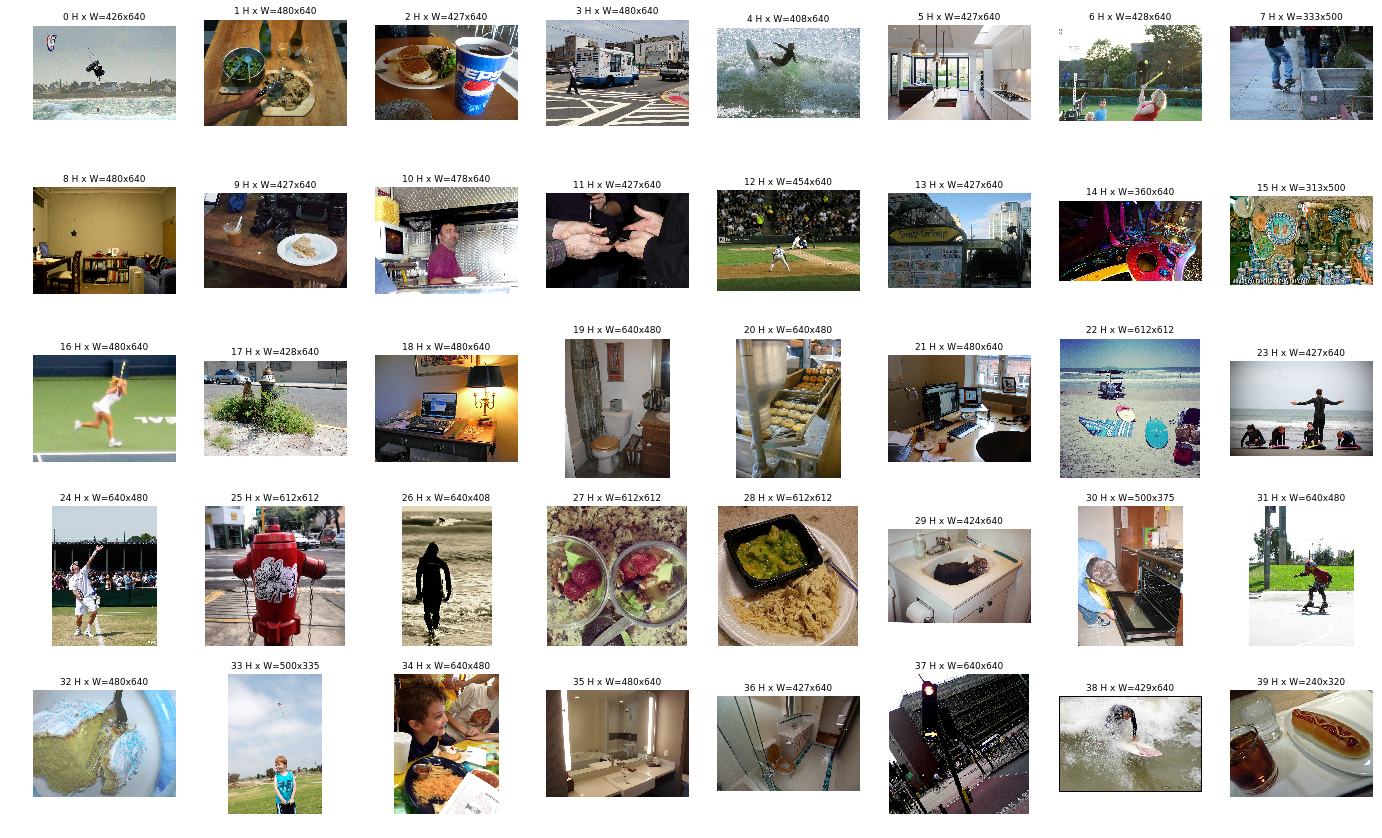

In [7]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

####  Display next image from generator

In [ ]:
train_batch_x, train_batch_y = next(test_generator)

In [ ]:

visualize.display_training_batch(dataset_test, train_batch_x)

#### Load a specific image using image_id

In [ ]:
from mrcnn.prep_notebook import run_full_inference_pipeline, run_mrcnn_inference_pipeline
# IMAGE_LIST = []      ## 62642 (persons),   68539 (trucks)36466 (surfers)  75040 (boat and persons)
# IMAGE_LIST = [36466] ## 36466 surfers. 5498 basketbal players, 27711,30531
# IMAGE_LIST = [5498] lots of motorcylces & persons - 
## Persons: #26026, #7719, 111864, 58240,  
# IMAGE_LIST = [89243] ##: Person, bicycle and traiffic lights
# IMAGE_LIST = [35347] ## - people and skaeboard  
# IMAGE_LIST = [59199]  ## books , sofa, living room
# IMAGE_LIST = [102868]  ## person in an airplane
# IMAGE_LIST = [101623] ## (cake and forks)
IMAGE_LIST = [107200]   ## people, snow and skis
# IMAGE_LIST = [41423]  ## (elephant & people)
# IMAGE_LIST = [49316]  ## Table, book, backpack, many bottles
# IMAGE_LIST = [75040] 
# IMAGE_LIST = [89243]
# IMAGE_LIST = [33477]  ## Table, bowl, cup, sandwich, knife
# IMAGE_LIST = [29731]
# IMAGE_LIST = [26763]  ## Table, chair, cup , bowl, bottle
# mrcnn_input = demo_image(dataset_train, mrcnn_model.config, IMAGE_LIST)
# outputs = run_mrcnn_inference_pipeline(mrcnn_model, dataset_test, image_ids = [50494] , verbose = 1)
outputs = run_full_inference_pipeline(mrcnn_model, fcn_model, dataset_test, image_ids = [50494] , verbose = 1)

In [ ]:
print(type(outputs), outputs.keys())

## Pass image through MRCNN and FCN

### `run_fcn_detection()`

In [20]:
try:
    fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, 247, verbose = 0)  
#     results = mrcnn_model.keras_model.predict(train_batch_x)
    # for i in results:
        # print(i.shape, type(i), np.any(np.isnan(i)))    
#     if np.any(np.isnan(results[1])):
#         print('\n Bad train_batch_x encountered (training phase) - epoch {} , image ids: {} -- Retry with next sample'.
#                 format(epoch_idx, train_batch_x[1][:,0]))
#     else :
#         good_sample = True
except Exception as e :
    print('\n failure on mrcnn predict - epoch {} , image ids: {} {}'.format(0,0,0))
    print('\n dataset image info: ' )
    print('\n Exception information:')
    print(str(e))
else:    
    r = fcn_results[0]


 failure on mrcnn predict - epoch 0 , image ids: 0 0

 dataset image info: 

 Exception information:
Reshape cannot infer the missing input size for an empty tensor unless all specified input sizes are non-zero
	 [[Node: cntxt_layer/MultivariateNormalDiag_3/prob/affine_linear_operator/inverse/DistributionShape/make_batch_of_event_sample_matrices/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](cntxt_layer/MultivariateNormalDiag_3/prob/affine_linear_operator/inverse/sub, cntxt_layer/MultivariateNormalDiag_3/prob/affine_linear_operator/inverse/DistributionShape/make_batch_of_event_sample_matrices/concat)]]
	 [[Node: cntxt_layer/pred_heatmap/_4397 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5791_cntxt_layer/pred_heatmap", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0

In [ ]:
# mrcnn_model.layer_info()
# from mrcnn.prep_notebook import run_pipeline, run_pipeline_on_input
# mrcnn_output, fcn_output, fcn_input = run_pipeline_on_input(mrcnn_model, fcn_model, mrcnn_input, verbose = 0)

model_pr_heatmap                = outputs['mrcnn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_pr_heatmap_scores         = outputs['mrcnn_output'][1]          # layer:  1   shape: (1, 81, 200, 11)
model_gt_heatmap                = outputs['mrcnn_output'][2]          # layer:  2   shape: (1, 256, 256, 81)
model_gt_heatmap_scores         = outputs['mrcnn_output'][3]          # layer:  3   shape: (1, 81, 200, 11)
model_fcn_heatmap               = outputs['fcn_output'][0]          # layer:  0   shape: (1, 256, 256, 81)
model_fcn_softmax               = outputs['fcn_output'][1]          # layer:  1   shape: ()
model_fcn_scores                = outputs['fcn_output'][2]
# model_MSE_loss                  = outputs['fcn_output'][2]          # layer:  1   shape: ()
# model_CE_loss                   = outputs['fcn_output'][3]          # layer:  1   shape: ()
# print('model_pr_heatmap       : ',model_gt_heatmap.shape)
# print('model_pr_heatmap_scores: ',model_gt_heatmap_scores.shape)
# print('model_gt_heatmap       : ',model_gt_heatmap.shape)
# print('model_gt_heatmap_scores: ',model_gt_heatmap_scores.shape)
# print('model_fcn_heatmap      :', model_fcn_heatmap.shape)
# print('model_fcn_softmax      :', model_fcn_softmax.shape)
# print(model_CE_loss,model_MSE_loss)
img_id = 0
print('Image id: ',img_id, ' Coco ID: ', dataset_test.image_info[img_id]['id'])
gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
pr_class_ids = np.unique(model_pr_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  Ground Truth ClassIds: {}'.format(img_id, gt_class_ids))
print('Image : {}  Predicted    ClassIds: {}'.format(img_id, pr_class_ids))

## Heatmap aggregation over a number of images

In [6]:
from mrcnn.utils import trim_zeros, compute_overlaps
from mrcnn.calculate_map import update_map_dictionaries
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

### Load previously saved AP Results from file

# All_APResults = {}

# path = "E:\\git_projs\\MRCNN3\\train_newshapes\\training_results"
# prev_AP_results_file= 'test_AP_results_2019_01_14'
# with open(os.path.join(path, prev_AP_results_file+'.pkl'), 'rb') as outfile:
#     APRes = pickle.load(outfile)
# All_APResults = APRes

# # print('/'.join(weights_file.split('/')[-3:]))
# print(len(All_APResults.keys()))
# for i in sorted(All_APResults):
#     print(i, All_APResults[i]['Epochs'])

### Load weight file

In [7]:
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
FCN_DIR_WEIGHTS =  '/home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000'
fcn_files       = ['fcn_1612.h5', 'fcn_1673.h5', 'fcn_2330.h5', 'fcn_3348.h5',
               'fcn_3742.h5', 'fcn_3816.h5', 'fcn_4345.h5']


FILE_IDX = 6
weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", weights_file)


Loading weights  /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5


In [8]:
fcn_model.load_model_weights(weights_file)

-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5
    Weights file loaded: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 
FCN  MODEL Load weight file COMPLETE 


### Run `compute_ap` over images

In [12]:
    # for FILE_IDX in [10]:
    #     FILE_IDX = 10
    #     weights_file = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
    #     print("Loading weights ", weights_file)
    #     fcn_model.load_model_weights(weights_file)
    save_path = "/home/kbardool/git_projs/mrcnn3/train_coco/average_heatmaps"
    NUM_CLASSES = 81
    #     save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\other"
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    print('Weight file: ', weights_file, ' epochs:', epochs)

#     IMGS = len(dataset_test.image_ids) # 1000
    IMGS = 500
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    image_ids = dataset_test.image_ids[:IMGS]
    print('Processing ',IMGS,' images')

    ###  Initialize data structures 
    agg_hm_shape = (256,256,NUM_CLASSES)
    pr_agg_hm  = np.zeros(agg_hm_shape)
    fcn_agg_hm = np.zeros(agg_hm_shape)
    pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
    fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
    
    gt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    dt_cls_counts = np.zeros((NUM_CLASSES), dtype = np.int)
    
    gt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    dt_ttl_img_by_inst = np.zeros((NUM_CLASSES, 200), dtype = np.int)  # 16 is config.MAX_SHAPES_PER_IMAGE
    
    imgs_one_gt = 0
    imgs_one_dt = 0
    sav_pr_min  = 0
    sav_pr_max  = 0
    sav_fcn_min = 0
    sav_fcn_max = 0
    failed_predicts = 0
    for image_id in image_ids:
        # Load image and ground truth data
        print('==> Calculate Heatmap aggregates for image_id : ', image_id)
        # Run object detection
        try:
            fcn_results = run_fcn_detection(fcn_model, mrcnn_model, dataset_test, image_id, verbose = 0)  
        except Exception as e :
            print('\n failure on mrcnn predict - image ids: {}'.format(image_id))
            print('\n dataset image info: ' )
            # print('\n Exception information:')
            # print(str(e))
            print(' n continue with next image' )
            failed_predicts += 1
            continue
        else:    
            pass
#             r = fcn_results[0]        
        
        r = fcn_results[0]
        
        gt_inst_per_class = np.bincount(np.abs(r['gt_class_ids']), minlength = NUM_CLASSES)
        dt_inst_per_class = np.bincount(r['class_ids']           , minlength = NUM_CLASSES)
        
        gt_cls_counts += gt_inst_per_class
        dt_cls_counts += dt_inst_per_class
        
        for i in range(NUM_CLASSES):
            gt_ttl_img_by_inst[i,gt_inst_per_class[i]] += 1
            dt_ttl_img_by_inst[i,dt_inst_per_class[i]] += 1
            
            
        if len(r['class_ids']) == 1: 
            imgs_one_dt += 1
        if len(r['gt_class_ids']) == 1:
            imgs_one_gt += 1
            
        pr_hm_clipped   = np.clip(r['pr_hm'], 0.0, 1.0)
        fcn_hm_clipped  = np.clip(r['fcn_hm'], 0.0, 1.0)

        pr_agg_hm          += r['pr_hm']
        fcn_agg_hm         += r['fcn_hm']
        pr_agg_hm_clipped  += np.clip(r['pr_hm'], 0.0, 1.0)
        fcn_agg_hm_clipped += np.clip(r['fcn_hm'], 0.0, 1.0)

        fcn_hm_max = np.max(r['fcn_hm'])
        fcn_hm_min = np.min(r['fcn_hm'])

        pr_hm_max = np.max(r['pr_hm'])
        pr_hm_min = np.min(r['pr_hm'])

        if fcn_hm_max > sav_fcn_max :
            sav_fcn_max = fcn_hm_max 

        if pr_hm_max > sav_pr_max:
            sav_pr_max = pr_hm_max

        if fcn_hm_min < sav_fcn_min :
            sav_fcn_min = fcn_hm_min 

        if pr_hm_min > sav_pr_min:
            sav_pr_min = pr_hm_min

#         np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
#         print('Results for image:')    
#         print('-------------------')
#         print(' # GT objects    :', len(r['gt_class_ids']))
#         print(r['gt_class_ids'])
#         print('gt_inst_per_class \n')
#         print(gt_inst_per_class)
#         print('gt_cls_counts \n')
#         print(gt_cls_counts)
        
#         print(' # of detections :', len(r['class_ids']))
#         print(r['class_ids'])
#         print('dt_inst_per_class \n')
#         print(dt_inst_per_class)   
#         print('dt_cls_counts \n')
#         print(dt_cls_counts)

#         print('   pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(pr_hm_min , pr_hm_max))
#         print('  fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(fcn_hm_min, fcn_hm_max))
#         print(' Original Heatmap:')
#         print('   pr_hm mins : ',np.min(r['pr_hm'], axis=(0,1)) ,' maxs: ', np.max(r['pr_hm'], axis=(0,1)))
#         print('   fcn_hm mins: ',np.min(r['fcn_hm'], axis=(0,1)),' maxs: ', np.max(r['fcn_hm'], axis=(0,1)))
#         print('   pr_hm sums : ',np.sum(r['pr_hm'], axis=(0,1)))
#         print('   fcn_hm sums: ',np.sum(r['fcn_hm'], axis=(0,1)))
#         print()
#         print(' Clipped Heatmap:')
#         print('   pr_hm mins : ',np.min(pr_hm_clipped, axis=(0,1)),' maxs: ', np.max(pr_hm_clipped, axis=(0,1)))
#         print('   fcn_hm mins: ',np.min(fcn_hm_clipped, axis=(0,1))  ,' maxs: ', np.max(fcn_hm_clipped, axis=(0,1)))
#         print('   pr_hm sums : ',np.sum(pr_hm_clipped, axis=(0,1)))
#         print('   fcn_hm sums: ',np.sum(fcn_hm_clipped, axis=(0,1)))


        if image_id+1 in [10,100,300, IMGS]:
            heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+str(image_id+1)+'_imgs.npz'
            print()
            print('Image count: ', image_id+1, '  Save to output file: ',os.path.join(save_path, heatmaps_file))
            np.savez_compressed(os.path.join(save_path, heatmaps_file),     
                            imgs_one_gt   = imgs_one_gt, 
                            imgs_one_dt   = imgs_one_dt,  
                            gt_cls_counts = gt_cls_counts, 
                            dt_cls_counts = dt_cls_counts,
                            gt_ttl_img_by_inst = gt_ttl_img_by_inst,
                            dt_ttl_img_by_inst = dt_ttl_img_by_inst,
                            sav_pr_min    = sav_pr_min  ,
                            sav_pr_max    = sav_pr_max  , 
                            sav_fcn_min   = sav_fcn_min , 
                            sav_fcn_max   = sav_fcn_max ,                     
                            pr_agg_hm     = pr_agg_hm  ,
                            fcn_agg_hm    = fcn_agg_hm  ,
                            pr_agg_hm_clipped  = pr_agg_hm_clipped,
                            fcn_agg_hm_clipped = fcn_agg_hm_clipped )                
            print()
            print('--------------------------------------------------')
            print(' Results at : ', image_id +1, ' processed images  - failed: ', failed_predicts)
            print('--------------------------------------------------')
            print(' pr_hm MIN : {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
            print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
            print()
            print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
            print(' Ground Truth by class:', gt_cls_counts)
            print(' Detections by class  :', dt_cls_counts)
            print()
            print(' Original Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
            print()
            print(' Clipped Heatmap:')
            print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
            print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
            print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))
            print('\n')
            print('gt_ttl_img_by_inst')
            print(gt_ttl_img_by_inst[34:45,:16])
            print('dt_ttl_img_by_inst')
            print(dt_ttl_img_by_inst[34:45,:16])

    print('\n\n')
    print('Agg heatmap Calcs completed for epoch:', epochs , ' (Weight file:', weights_file, ')')


Weight file:  /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5  epochs: 4345
Processing  500  images
==> Calculate Heatmap aggregates for image_id :  0


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  1
==> Calculate Heatmap aggregates for image_id :  2
==> Calculate Heatmap aggregates for image_id :  3
==> Calculate Heatmap aggregates for image_id :  4


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  5
==> Calculate Heatmap aggregates for image_id :  6


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  7


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  8
==> Calculate Heatmap aggregates for image_id :  9

Image count:  10   Save to output file:  /home/kbardool/git_projs/mrcnn3/train_coco/other/agg_heatmaps_epoch_4345_10_imgs.npz

--------------------------------------------------
 Results at :  10  processed images  - failed:  0
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      1.00000
 fcn_hm MIN:     -0.13907      MAX:      0.42985

 images with one gt object: 2   one detection from MR-CNN: 0
 Ground Truth by class: [0 0 0 0 0 0 0 0 0 0 6 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 2 2 3 2 3 1 1 2 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0]
 Detections by class  : [ 0  0  0  0  0  0  0  0  0  0 26  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0
  1  2  2  4  4  2  3 29  2 25  4  2  1 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  4  0  0  5  1  0  0  0  0  0  0  0

/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  11
==> Calculate Heatmap aggregates for image_id :  12
==> Calculate Heatmap aggregates for image_id :  13
==> Calculate Heatmap aggregates for image_id :  14
==> Calculate Heatmap aggregates for image_id :  15
==> Calculate Heatmap aggregates for image_id :  16
==> Calculate Heatmap aggregates for image_id :  17


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  18
==> Calculate Heatmap aggregates for image_id :  19
==> Calculate Heatmap aggregates for image_id :  20
==> Calculate Heatmap aggregates for image_id :  21
==> Calculate Heatmap aggregates for image_id :  22
==> Calculate Heatmap aggregates for image_id :  23
==> Calculate Heatmap aggregates for image_id :  24
==> Calculate Heatmap aggregates for image_id :  25
==> Calculate Heatmap aggregates for image_id :  26


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  27
==> Calculate Heatmap aggregates for image_id :  28
==> Calculate Heatmap aggregates for image_id :  29
==> Calculate Heatmap aggregates for image_id :  30
==> Calculate Heatmap aggregates for image_id :  31
==> Calculate Heatmap aggregates for image_id :  32
==> Calculate Heatmap aggregates for image_id :  33
==> Calculate Heatmap aggregates for image_id :  34
==> Calculate Heatmap aggregates for image_id :  35
==> Calculate Heatmap aggregates for image_id :  36
==> Calculate Heatmap aggregates for image_id :  37
==> Calculate Heatmap aggregates for image_id :  38
==> Calculate Heatmap aggregates for image_id :  39
==> Calculate Heatmap aggregates for image_id :  40


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  41
==> Calculate Heatmap aggregates for image_id :  42


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  43
==> Calculate Heatmap aggregates for image_id :  44
==> Calculate Heatmap aggregates for image_id :  45
==> Calculate Heatmap aggregates for image_id :  46


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  47
==> Calculate Heatmap aggregates for image_id :  48


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  49
==> Calculate Heatmap aggregates for image_id :  50
==> Calculate Heatmap aggregates for image_id :  51
==> Calculate Heatmap aggregates for image_id :  52
==> Calculate Heatmap aggregates for image_id :  53
==> Calculate Heatmap aggregates for image_id :  54


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  55
==> Calculate Heatmap aggregates for image_id :  56


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  57


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  58
==> Calculate Heatmap aggregates for image_id :  59
==> Calculate Heatmap aggregates for image_id :  60


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  61


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  62


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  63
==> Calculate Heatmap aggregates for image_id :  64


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  65
==> Calculate Heatmap aggregates for image_id :  66
==> Calculate Heatmap aggregates for image_id :  67
==> Calculate Heatmap aggregates for image_id :  68
==> Calculate Heatmap aggregates for image_id :  69
==> Calculate Heatmap aggregates for image_id :  70
==> Calculate Heatmap aggregates for image_id :  71
==> Calculate Heatmap aggregates for image_id :  72
==> Calculate Heatmap aggregates for image_id :  73
==> Calculate Heatmap aggregates for image_id :  74
==> Calculate Heatmap aggregates for image_id :  75
==> Calculate Heatmap aggregates for image_id :  76
==> Calculate Heatmap aggregates for image_id :  77
==> Calculate Heatmap aggregates for image_id :  78
==> Calculate Heatmap aggregates for image_id :  79


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  80
==> Calculate Heatmap aggregates for image_id :  81
==> Calculate Heatmap aggregates for image_id :  82
==> Calculate Heatmap aggregates for image_id :  83
==> Calculate Heatmap aggregates for image_id :  84


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  85
==> Calculate Heatmap aggregates for image_id :  86


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  87
==> Calculate Heatmap aggregates for image_id :  88
==> Calculate Heatmap aggregates for image_id :  89


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  90
==> Calculate Heatmap aggregates for image_id :  91
==> Calculate Heatmap aggregates for image_id :  92


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  93
==> Calculate Heatmap aggregates for image_id :  94


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  95


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  96


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  97
==> Calculate Heatmap aggregates for image_id :  98
==> Calculate Heatmap aggregates for image_id :  99

Image count:  100   Save to output file:  /home/kbardool/git_projs/mrcnn3/train_coco/other/agg_heatmaps_epoch_4345_100_imgs.npz

--------------------------------------------------
 Results at :  100  processed images  - failed:  0
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      1.00000
 fcn_hm MIN:     -0.16327      MAX:      0.42985

 images with one gt object: 41   one detection from MR-CNN: 1
 Ground Truth by class: [ 0  0  0  0  0  0  0  0  0  0 23  3  1  8 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  3  2
 21  2  5  7 12 18  9 35 10 18  5  7  5 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  5  7  0 12  3  0  0  0  0  0  0  0]
 Detections by class  : [  0   0   0   0   0   0   0   0   0   0 179  20  23   2  17   0   0   0   0   0   0   0   0   0
   0   0

==> Calculate Heatmap aggregates for image_id :  101
==> Calculate Heatmap aggregates for image_id :  102
==> Calculate Heatmap aggregates for image_id :  103
==> Calculate Heatmap aggregates for image_id :  104
==> Calculate Heatmap aggregates for image_id :  105
==> Calculate Heatmap aggregates for image_id :  106
==> Calculate Heatmap aggregates for image_id :  107


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  108
==> Calculate Heatmap aggregates for image_id :  109
==> Calculate Heatmap aggregates for image_id :  110
==> Calculate Heatmap aggregates for image_id :  111
==> Calculate Heatmap aggregates for image_id :  112


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  113


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  114
==> Calculate Heatmap aggregates for image_id :  115
==> Calculate Heatmap aggregates for image_id :  116
==> Calculate Heatmap aggregates for image_id :  117
==> Calculate Heatmap aggregates for image_id :  118
==> Calculate Heatmap aggregates for image_id :  119


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  120
==> Calculate Heatmap aggregates for image_id :  121
==> Calculate Heatmap aggregates for image_id :  122


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  123
==> Calculate Heatmap aggregates for image_id :  124
==> Calculate Heatmap aggregates for image_id :  125
==> Calculate Heatmap aggregates for image_id :  126
==> Calculate Heatmap aggregates for image_id :  127
==> Calculate Heatmap aggregates for image_id :  128
==> Calculate Heatmap aggregates for image_id :  129
==> Calculate Heatmap aggregates for image_id :  130
==> Calculate Heatmap aggregates for image_id :  131
==> Calculate Heatmap aggregates for image_id :  132
==> Calculate Heatmap aggregates for image_id :  133
==> Calculate Heatmap aggregates for image_id :  134
==> Calculate Heatmap aggregates for image_id :  135
==> Calculate Heatmap aggregates for image_id :  136


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  137
==> Calculate Heatmap aggregates for image_id :  138
==> Calculate Heatmap aggregates for image_id :  139


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  140
==> Calculate Heatmap aggregates for image_id :  141
==> Calculate Heatmap aggregates for image_id :  142


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  143
==> Calculate Heatmap aggregates for image_id :  144
==> Calculate Heatmap aggregates for image_id :  145
==> Calculate Heatmap aggregates for image_id :  146


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  147
==> Calculate Heatmap aggregates for image_id :  148


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  149
==> Calculate Heatmap aggregates for image_id :  150
==> Calculate Heatmap aggregates for image_id :  151
==> Calculate Heatmap aggregates for image_id :  152


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  153
==> Calculate Heatmap aggregates for image_id :  154
==> Calculate Heatmap aggregates for image_id :  155
==> Calculate Heatmap aggregates for image_id :  156


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  157
==> Calculate Heatmap aggregates for image_id :  158
==> Calculate Heatmap aggregates for image_id :  159
==> Calculate Heatmap aggregates for image_id :  160
==> Calculate Heatmap aggregates for image_id :  161
==> Calculate Heatmap aggregates for image_id :  162
==> Calculate Heatmap aggregates for image_id :  163
==> Calculate Heatmap aggregates for image_id :  164
==> Calculate Heatmap aggregates for image_id :  165


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  166
==> Calculate Heatmap aggregates for image_id :  167


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  168
==> Calculate Heatmap aggregates for image_id :  169
==> Calculate Heatmap aggregates for image_id :  170
==> Calculate Heatmap aggregates for image_id :  171
==> Calculate Heatmap aggregates for image_id :  172
==> Calculate Heatmap aggregates for image_id :  173
==> Calculate Heatmap aggregates for image_id :  174
==> Calculate Heatmap aggregates for image_id :  175
==> Calculate Heatmap aggregates for image_id :  176
==> Calculate Heatmap aggregates for image_id :  177


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  178
==> Calculate Heatmap aggregates for image_id :  179


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  180
==> Calculate Heatmap aggregates for image_id :  181


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  182
==> Calculate Heatmap aggregates for image_id :  183
==> Calculate Heatmap aggregates for image_id :  184


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  185
==> Calculate Heatmap aggregates for image_id :  186
==> Calculate Heatmap aggregates for image_id :  187
==> Calculate Heatmap aggregates for image_id :  188


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  189
==> Calculate Heatmap aggregates for image_id :  190
==> Calculate Heatmap aggregates for image_id :  191


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  192


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  193
==> Calculate Heatmap aggregates for image_id :  194
==> Calculate Heatmap aggregates for image_id :  195
==> Calculate Heatmap aggregates for image_id :  196
==> Calculate Heatmap aggregates for image_id :  197
==> Calculate Heatmap aggregates for image_id :  198


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  199


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  200
==> Calculate Heatmap aggregates for image_id :  201
==> Calculate Heatmap aggregates for image_id :  202
==> Calculate Heatmap aggregates for image_id :  203
==> Calculate Heatmap aggregates for image_id :  204
==> Calculate Heatmap aggregates for image_id :  205


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  206
==> Calculate Heatmap aggregates for image_id :  207


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  208
==> Calculate Heatmap aggregates for image_id :  209


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  210


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  211
==> Calculate Heatmap aggregates for image_id :  212
==> Calculate Heatmap aggregates for image_id :  213
==> Calculate Heatmap aggregates for image_id :  214
==> Calculate Heatmap aggregates for image_id :  215
==> Calculate Heatmap aggregates for image_id :  216
==> Calculate Heatmap aggregates for image_id :  217


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  218
==> Calculate Heatmap aggregates for image_id :  219
==> Calculate Heatmap aggregates for image_id :  220
==> Calculate Heatmap aggregates for image_id :  221
==> Calculate Heatmap aggregates for image_id :  222
==> Calculate Heatmap aggregates for image_id :  223
==> Calculate Heatmap aggregates for image_id :  224
==> Calculate Heatmap aggregates for image_id :  225


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  226
==> Calculate Heatmap aggregates for image_id :  227
==> Calculate Heatmap aggregates for image_id :  228
==> Calculate Heatmap aggregates for image_id :  229
==> Calculate Heatmap aggregates for image_id :  230
==> Calculate Heatmap aggregates for image_id :  231
==> Calculate Heatmap aggregates for image_id :  232
==> Calculate Heatmap aggregates for image_id :  233
==> Calculate Heatmap aggregates for image_id :  234
==> Calculate Heatmap aggregates for image_id :  235
==> Calculate Heatmap aggregates for image_id :  236
==> Calculate Heatmap aggregates for image_id :  237
==> Calculate Heatmap aggregates for image_id :  238
==> Calculate Heatmap aggregates for image_id :  239


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  240
==> Calculate Heatmap aggregates for image_id :  241
==> Calculate Heatmap aggregates for image_id :  242
==> Calculate Heatmap aggregates for image_id :  243
==> Calculate Heatmap aggregates for image_id :  244
==> Calculate Heatmap aggregates for image_id :  245
==> Calculate Heatmap aggregates for image_id :  246
==> Calculate Heatmap aggregates for image_id :  247

 failure on mrcnn predict - image ids: 247

 dataset image info: 
 n continue with next image
==> Calculate Heatmap aggregates for image_id :  248
==> Calculate Heatmap aggregates for image_id :  249
==> Calculate Heatmap aggregates for image_id :  250
==> Calculate Heatmap aggregates for image_id :  251
==> Calculate Heatmap aggregates for image_id :  252
==> Calculate Heatmap aggregates for image_id :  253


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  254
==> Calculate Heatmap aggregates for image_id :  255
==> Calculate Heatmap aggregates for image_id :  256
==> Calculate Heatmap aggregates for image_id :  257
==> Calculate Heatmap aggregates for image_id :  258
==> Calculate Heatmap aggregates for image_id :  259
==> Calculate Heatmap aggregates for image_id :  260
==> Calculate Heatmap aggregates for image_id :  261
==> Calculate Heatmap aggregates for image_id :  262


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  263
==> Calculate Heatmap aggregates for image_id :  264
==> Calculate Heatmap aggregates for image_id :  265
==> Calculate Heatmap aggregates for image_id :  266
==> Calculate Heatmap aggregates for image_id :  267
==> Calculate Heatmap aggregates for image_id :  268


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  269


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  270
==> Calculate Heatmap aggregates for image_id :  271


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  272
==> Calculate Heatmap aggregates for image_id :  273
==> Calculate Heatmap aggregates for image_id :  274
==> Calculate Heatmap aggregates for image_id :  275
==> Calculate Heatmap aggregates for image_id :  276
==> Calculate Heatmap aggregates for image_id :  277


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  278
==> Calculate Heatmap aggregates for image_id :  279
==> Calculate Heatmap aggregates for image_id :  280
==> Calculate Heatmap aggregates for image_id :  281
==> Calculate Heatmap aggregates for image_id :  282
==> Calculate Heatmap aggregates for image_id :  283
==> Calculate Heatmap aggregates for image_id :  284
==> Calculate Heatmap aggregates for image_id :  285
==> Calculate Heatmap aggregates for image_id :  286
==> Calculate Heatmap aggregates for image_id :  287


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  288
==> Calculate Heatmap aggregates for image_id :  289
==> Calculate Heatmap aggregates for image_id :  290


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  291
==> Calculate Heatmap aggregates for image_id :  292
==> Calculate Heatmap aggregates for image_id :  293
==> Calculate Heatmap aggregates for image_id :  294
==> Calculate Heatmap aggregates for image_id :  295
==> Calculate Heatmap aggregates for image_id :  296


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  297
==> Calculate Heatmap aggregates for image_id :  298
==> Calculate Heatmap aggregates for image_id :  299

Image count:  300   Save to output file:  /home/kbardool/git_projs/mrcnn3/train_coco/other/agg_heatmaps_epoch_4345_300_imgs.npz

--------------------------------------------------
 Results at :  300  processed images  - failed:  1
--------------------------------------------------
 pr_hm MIN :      0.00000      MAX:      1.00000
 fcn_hm MIN:     -0.17409      MAX:      0.51088

 images with one gt object: 125   one detection from MR-CNN: 3
 Ground Truth by class: [  0   0   0   0   0   0   0   0   0   0  81   8  12   9  48   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  21  29   9  44  16  10  12  26  35  30 142  48  80  32  48  26  78   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9  21   1
  36  13   0   0   0   0   0   0   0]
 Detections by class  : [  0   0   0   0   

==> Calculate Heatmap aggregates for image_id :  301


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  302
==> Calculate Heatmap aggregates for image_id :  303


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  304
==> Calculate Heatmap aggregates for image_id :  305
==> Calculate Heatmap aggregates for image_id :  306


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  307
==> Calculate Heatmap aggregates for image_id :  308


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  309


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  310
==> Calculate Heatmap aggregates for image_id :  311


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  312
==> Calculate Heatmap aggregates for image_id :  313
==> Calculate Heatmap aggregates for image_id :  314
==> Calculate Heatmap aggregates for image_id :  315
==> Calculate Heatmap aggregates for image_id :  316
==> Calculate Heatmap aggregates for image_id :  317
==> Calculate Heatmap aggregates for image_id :  318
==> Calculate Heatmap aggregates for image_id :  319
==> Calculate Heatmap aggregates for image_id :  320
==> Calculate Heatmap aggregates for image_id :  321
==> Calculate Heatmap aggregates for image_id :  322


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  323


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  324
==> Calculate Heatmap aggregates for image_id :  325


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  326
==> Calculate Heatmap aggregates for image_id :  327


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  328


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  329


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  330
==> Calculate Heatmap aggregates for image_id :  331


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  332


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  333
==> Calculate Heatmap aggregates for image_id :  334


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  335
==> Calculate Heatmap aggregates for image_id :  336
==> Calculate Heatmap aggregates for image_id :  337
==> Calculate Heatmap aggregates for image_id :  338
==> Calculate Heatmap aggregates for image_id :  339
==> Calculate Heatmap aggregates for image_id :  340
==> Calculate Heatmap aggregates for image_id :  341
==> Calculate Heatmap aggregates for image_id :  342
==> Calculate Heatmap aggregates for image_id :  343
==> Calculate Heatmap aggregates for image_id :  344
==> Calculate Heatmap aggregates for image_id :  345
==> Calculate Heatmap aggregates for image_id :  346
==> Calculate Heatmap aggregates for image_id :  347
==> Calculate Heatmap aggregates for image_id :  348
==> Calculate Heatmap aggregates for image_id :  349


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  350
==> Calculate Heatmap aggregates for image_id :  351


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  352
==> Calculate Heatmap aggregates for image_id :  353


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  354


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  355
==> Calculate Heatmap aggregates for image_id :  356


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  357
==> Calculate Heatmap aggregates for image_id :  358
==> Calculate Heatmap aggregates for image_id :  359
==> Calculate Heatmap aggregates for image_id :  360
==> Calculate Heatmap aggregates for image_id :  361
==> Calculate Heatmap aggregates for image_id :  362
==> Calculate Heatmap aggregates for image_id :  363


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  364
==> Calculate Heatmap aggregates for image_id :  365
==> Calculate Heatmap aggregates for image_id :  366
==> Calculate Heatmap aggregates for image_id :  367
==> Calculate Heatmap aggregates for image_id :  368
==> Calculate Heatmap aggregates for image_id :  369


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  370
==> Calculate Heatmap aggregates for image_id :  371


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  372
==> Calculate Heatmap aggregates for image_id :  373
==> Calculate Heatmap aggregates for image_id :  374
==> Calculate Heatmap aggregates for image_id :  375
==> Calculate Heatmap aggregates for image_id :  376
==> Calculate Heatmap aggregates for image_id :  377
==> Calculate Heatmap aggregates for image_id :  378
==> Calculate Heatmap aggregates for image_id :  379
==> Calculate Heatmap aggregates for image_id :  380
==> Calculate Heatmap aggregates for image_id :  381
==> Calculate Heatmap aggregates for image_id :  382
==> Calculate Heatmap aggregates for image_id :  383


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  384
==> Calculate Heatmap aggregates for image_id :  385
==> Calculate Heatmap aggregates for image_id :  386


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  387
==> Calculate Heatmap aggregates for image_id :  388
==> Calculate Heatmap aggregates for image_id :  389
==> Calculate Heatmap aggregates for image_id :  390
==> Calculate Heatmap aggregates for image_id :  391


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  392


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  393
==> Calculate Heatmap aggregates for image_id :  394
==> Calculate Heatmap aggregates for image_id :  395
==> Calculate Heatmap aggregates for image_id :  396
==> Calculate Heatmap aggregates for image_id :  397
==> Calculate Heatmap aggregates for image_id :  398
==> Calculate Heatmap aggregates for image_id :  399
==> Calculate Heatmap aggregates for image_id :  400
==> Calculate Heatmap aggregates for image_id :  401
==> Calculate Heatmap aggregates for image_id :  402


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  403
==> Calculate Heatmap aggregates for image_id :  404
==> Calculate Heatmap aggregates for image_id :  405


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  406
==> Calculate Heatmap aggregates for image_id :  407


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  408
==> Calculate Heatmap aggregates for image_id :  409
==> Calculate Heatmap aggregates for image_id :  410


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  411


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  412
==> Calculate Heatmap aggregates for image_id :  413
==> Calculate Heatmap aggregates for image_id :  414
==> Calculate Heatmap aggregates for image_id :  415
==> Calculate Heatmap aggregates for image_id :  416
==> Calculate Heatmap aggregates for image_id :  417
==> Calculate Heatmap aggregates for image_id :  418
==> Calculate Heatmap aggregates for image_id :  419
==> Calculate Heatmap aggregates for image_id :  420
==> Calculate Heatmap aggregates for image_id :  421
==> Calculate Heatmap aggregates for image_id :  422
==> Calculate Heatmap aggregates for image_id :  423
==> Calculate Heatmap aggregates for image_id :  424
==> Calculate Heatmap aggregates for image_id :  425
==> Calculate Heatmap aggregates for image_id :  426
==> Calculate Heatmap aggregates for image_id :  427
==> Calculate Heatmap aggregates for image_id :  428
==> Calculate Heatmap aggregates for image_id :  429
==> Calculate Heatmap aggregates for image_id 

/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  431
==> Calculate Heatmap aggregates for image_id :  432


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  433
==> Calculate Heatmap aggregates for image_id :  434
==> Calculate Heatmap aggregates for image_id :  435
==> Calculate Heatmap aggregates for image_id :  436
==> Calculate Heatmap aggregates for image_id :  437
==> Calculate Heatmap aggregates for image_id :  438


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  439
==> Calculate Heatmap aggregates for image_id :  440
==> Calculate Heatmap aggregates for image_id :  441
==> Calculate Heatmap aggregates for image_id :  442
==> Calculate Heatmap aggregates for image_id :  443


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  444
==> Calculate Heatmap aggregates for image_id :  445
==> Calculate Heatmap aggregates for image_id :  446
==> Calculate Heatmap aggregates for image_id :  447
==> Calculate Heatmap aggregates for image_id :  448
==> Calculate Heatmap aggregates for image_id :  449


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  450
==> Calculate Heatmap aggregates for image_id :  451
==> Calculate Heatmap aggregates for image_id :  452
==> Calculate Heatmap aggregates for image_id :  453
==> Calculate Heatmap aggregates for image_id :  454
==> Calculate Heatmap aggregates for image_id :  455
==> Calculate Heatmap aggregates for image_id :  456


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  457


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  458
==> Calculate Heatmap aggregates for image_id :  459
==> Calculate Heatmap aggregates for image_id :  460
==> Calculate Heatmap aggregates for image_id :  461
==> Calculate Heatmap aggregates for image_id :  462
==> Calculate Heatmap aggregates for image_id :  463
==> Calculate Heatmap aggregates for image_id :  464
==> Calculate Heatmap aggregates for image_id :  465
==> Calculate Heatmap aggregates for image_id :  466
==> Calculate Heatmap aggregates for image_id :  467


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  468
==> Calculate Heatmap aggregates for image_id :  469
==> Calculate Heatmap aggregates for image_id :  470
==> Calculate Heatmap aggregates for image_id :  471
==> Calculate Heatmap aggregates for image_id :  472


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  473


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  474
==> Calculate Heatmap aggregates for image_id :  475
==> Calculate Heatmap aggregates for image_id :  476
==> Calculate Heatmap aggregates for image_id :  477
==> Calculate Heatmap aggregates for image_id :  478
==> Calculate Heatmap aggregates for image_id :  479


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  480
==> Calculate Heatmap aggregates for image_id :  481
==> Calculate Heatmap aggregates for image_id :  482
==> Calculate Heatmap aggregates for image_id :  483
==> Calculate Heatmap aggregates for image_id :  484


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  485


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  486


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  487


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  488
==> Calculate Heatmap aggregates for image_id :  489
==> Calculate Heatmap aggregates for image_id :  490


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  491
==> Calculate Heatmap aggregates for image_id :  492
==> Calculate Heatmap aggregates for image_id :  493
==> Calculate Heatmap aggregates for image_id :  494
==> Calculate Heatmap aggregates for image_id :  495
==> Calculate Heatmap aggregates for image_id :  496


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  497
==> Calculate Heatmap aggregates for image_id :  498


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


==> Calculate Heatmap aggregates for image_id :  499

 failure on mrcnn predict - image ids: 499

 dataset image info: 
 n continue with next image



Agg heatmap Calcs completed for epoch: 4345  (Weight file: /home/kbardool/models_coco/train_fcn8L2_BCE_subset/fcn20190120T0000/fcn_4345.h5 )


###  save heatmaps  and data to .npz file 

In [14]:
epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
heatmaps_file = 'agg_heatmaps_epoch_'+epochs+'_'+str(IMGS)+'_imgs.npz'
print(epochs , ' ---> ', heatmaps_file)

print('  output file: ',os.path.join(save_path, heatmaps_file))

np.savez_compressed(os.path.join(save_path, heatmaps_file), 
                imgs_one_gt   = imgs_one_gt, 
                imgs_one_dt   = imgs_one_dt,  
                gt_cls_counts = gt_cls_counts, 
                dt_cls_counts = dt_cls_counts,
                gt_ttl_img_by_inst = gt_ttl_img_by_inst,
                dt_ttl_img_by_inst = dt_ttl_img_by_inst,                    
                sav_pr_min    = sav_pr_min  ,
                sav_pr_max    = sav_pr_max  , 
                sav_fcn_min   = sav_fcn_min , 
                sav_fcn_max   = sav_fcn_max ,                     
                pr_agg_hm     = pr_agg_hm  ,
                fcn_agg_hm    = fcn_agg_hm  ,
                pr_agg_hm_clipped  = pr_agg_hm_clipped,
                fcn_agg_hm_clipped = fcn_agg_hm_clipped )           

4345  --->  agg_heatmaps_epoch_4345_500_imgs.npz
  output file:  /home/kbardool/git_projs/mrcnn3/train_coco/other/agg_heatmaps_epoch_4345_500_imgs.npz


### devleoping code 

In [ ]:
print(' Length of results from MRCNN detect: ', len(fcn_results))
r = fcn_results[0]
print('fcn_results keys: ')
print('--------------------')
for i in sorted(r.keys()):
    print('   {:.<25s}  {}'.format(i , r[i].shape))        
print()

In [ ]:
agg_hm_shape = (128,128,7)
pr_agg_hm  = np.zeros(agg_hm_shape)
fcn_agg_hm = np.zeros(agg_hm_shape)
pr_agg_hm_clipped  = np.zeros(agg_hm_shape)
fcn_agg_hm_clipped = np.zeros(agg_hm_shape)
imgs_one_gt = 0
imgs_one_dt = 0
sav_pr_min  = 0
sav_pr_max  = 0
sav_fcn_min = 0
sav_fcn_max = 0

In [ ]:
gt_cls_count = np.zeros((7), dtype = np.int)
dt_cls_count = np.zeros((7), dtype = np.int)
print(r['gt_class_ids'])
print(r['class_ids'])

In [ ]:
gt_cnts = np.bincount(r['gt_class_ids'], minlength = 7)
dt_cnts = np.bincount(r['class_ids'], minlength = 7)
gt_cls_count += gt_cnts
dt_cls_count += dt_cnts
print(gt_cnts)
print(gt_cls_count)
print(dt_cnts)
print(dt_cls_count)

In [ ]:


if len(r['class_ids']) == 1: 
    imgs_one_dt += 1
if len(r['gt_class_ids']) == 1:
    imgs_one_gt  += 1
pr_hm_clipped   = np.clip(r['pr_hm'], 0.0, 1.0)
fcn_hm_clipped  = np.clip(r['fcn_hm'], 0.0, 1.0)

pr_agg_hm          += r['pr_hm']
fcn_agg_hm         += r['fcn_hm']
pr_agg_hm_clipped  += np.clip(r['pr_hm'], 0.0, 1.0)
fcn_agg_hm_clipped += np.clip(r['fcn_hm'], 0.0, 1.0)

fcn_hm_max = np.max(r['fcn_hm'])
fcn_hm_min = np.min(r['fcn_hm'])

pr_hm_max = np.max(r['pr_hm'])
pr_hm_min = np.min(r['pr_hm'])

if fcn_hm_max > sav_fcn_max :
    sav_fcn_max = fcn_hm_max 

if pr_hm_max > sav_pr_max:
    sav_pr_max = pr_hm_max

if fcn_hm_min < sav_fcn_min :
    sav_fcn_min = fcn_hm_min 

if pr_hm_min > sav_pr_min:
    sav_pr_min = pr_hm_min
    
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

print('Results for image:')    
print('-------------------')
print(' # GT objects in image    :', len(r['gt_class_ids'])     , '  # of detections :', len(r['class_ids']))
print('   pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(pr_hm_min , pr_hm_max))
print('  fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(fcn_hm_min, fcn_hm_max))
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(r['pr_hm'], axis=(0,1)) ,' maxs: ', np.max(r['pr_hm'], axis=(0,1)))
print('   fcn_hm mins: ',np.min(r['fcn_hm'], axis=(0,1)),' maxs: ', np.max(r['fcn_hm'], axis=(0,1)))
print('   pr_hm sums : ',np.sum(r['pr_hm'], axis=(0,1)))
print('   fcn_hm sums: ',np.sum(r['fcn_hm'], axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_hm_clipped, axis=(0,1)),' maxs: ', np.max(pr_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_hm_clipped, axis=(0,1))  ,' maxs: ', np.max(fcn_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_hm_clipped, axis=(0,1)))



print('\n\n')
print(' Final Results:')
print('---------------')
print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
print()
print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
print()
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm , axis=(0,1)),' maxs: ', np.max(pr_agg_hm , axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm , axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))

### Load and Display saved .npz file 

In [54]:
epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print(epochs)

heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+str(20)+'_imgs.npz'
print(heatmaps_file)

print('  output file: ',os.path.join(save_path, heatmaps_file))

0821
agg_heatmaps_epoch_0821_20_imgs.npz
  output file:  E:\git_projs\MRCNN3\train_newshapes\average_heatmaps\agg_heatmaps_epoch_0821_20_imgs.npz


In [55]:
loaddata = np.load(os.path.join(save_path, heatmaps_file))

type(loaddata)


l_imgs_one_gt = loaddata['imgs_one_gt']  
l_imgs_one_dt = loaddata['imgs_one_dt']
l_gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst'],
l_dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst'],
l_sav_pr_min  = loaddata['sav_pr_min'] 
l_sav_pr_max  = loaddata['sav_pr_max']  
l_sav_fcn_min = loaddata['sav_fcn_min']
l_sav_fcn_max = loaddata['sav_fcn_max']
l_pr_agg_hm   = loaddata['pr_agg_hm']
l_fcn_agg_hm  = loaddata['fcn_agg_hm']
l_pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
l_fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']


print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(l_sav_pr_min, l_sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(l_sav_fcn_min, l_sav_fcn_max))
print()
print(' images with one gt object:', l_imgs_one_gt, '  one detection from MR-CNN:', l_imgs_one_dt)
print()
print(' Original Heatmap:')
print('   pr_hm mins : ',np.min(l_pr_agg_hm , axis=(0,1)),' maxs: ', np.max(l_pr_agg_hm , axis=(0,1)))
print('   fcn_hm mins: ',np.min(l_fcn_agg_hm, axis=(0,1)),' maxs: ', np.max(l_fcn_agg_hm, axis=(0,1)))
print('   pr_hm sums : ',np.sum(l_pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(l_fcn_agg_hm , axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(l_pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(l_pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(l_fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(l_fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(l_pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(l_fcn_agg_hm_clipped, axis=(0,1)))

  pr_hm MIN:      0.00000      MAX:      1.00000
 fcn_hm MIN:     -3.56792      MAX:      1.18562

 images with one gt object: 2   one detection from MR-CNN: 2

 Original Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 1.8770 2.3233 2.0810 2.6800 1.7789 3.5330]
   fcn_hm mins:  [ -0.0001 -25.1418 -14.9241 -23.9941 -12.7741 -23.3497 -18.0801]  maxs:  [ 0.0001 -0.7623  0.2094 -1.0247  0.3314 -0.3817  2.5551]
   pr_hm sums :  [   0.0000  438.3976 1092.1847  332.0509 1660.9972  675.0004 1019.0927]
   fcn_hm sums:  [     -0.0084 -124706.8728  -81722.7683 -136344.3595  -81049.0407 -128318.6379  -81012.0410]

 Clipped Heatmap:
   pr_hm mins :  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0000 1.8770 2.3233 2.0810 2.6800 1.7789 3.5330]
   fcn_hm mins:  [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]  maxs:  [0.0001 1.0298 2.2760 1.6191 2.8744 2.1363 4.0747]
   pr_hm sums :  [   0.0000  438.3976 1092.1847  332.0509 1660.9972  675.

## Load and display Heatmaps

In [2]:
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
epochs = '4345'
count  = '500'
print(epochs, count)

heatmaps_file =  'agg_heatmaps_epoch_'+epochs+'_'+count+'_imgs.npz'
print(heatmaps_file)

print('  input file: ',os.path.join(save_path, heatmaps_file))

4345 500
agg_heatmaps_epoch_4345_500_imgs.npz
  input file:  E:/git_projs/mrcnn3/train_coco/average_heatmaps\agg_heatmaps_epoch_4345_500_imgs.npz


In [3]:
np_format = {}
np_format['float']  = lambda x: "%10.4f" % x
np_format['int']    = lambda x: "%8d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

loaddata = np.load(os.path.join(save_path, heatmaps_file))

print(type(loaddata))
print(type(loaddata['gt_ttl_img_by_inst']),'  ', type(loaddata['gt_ttl_img_by_inst'][0]))
gt_cls_counts = loaddata['gt_cls_counts']  
dt_cls_counts = loaddata['dt_cls_counts']  
imgs_one_gt   = loaddata['imgs_one_gt']  
imgs_one_dt   = loaddata['imgs_one_dt'] 
gt_ttl_img_by_inst = loaddata['gt_ttl_img_by_inst']
dt_ttl_img_by_inst = loaddata['dt_ttl_img_by_inst']

sav_pr_min    = loaddata['sav_pr_min'] 
sav_pr_max    = loaddata['sav_pr_max']  
sav_fcn_min   = loaddata['sav_fcn_min']
sav_fcn_max   = loaddata['sav_fcn_max']
pr_agg_hm     = loaddata['pr_agg_hm']
fcn_agg_hm    = loaddata['fcn_agg_hm']
pr_agg_hm_clipped = loaddata['pr_agg_hm_clipped']
fcn_agg_hm_clipped = loaddata['fcn_agg_hm_clipped']

   
print('\n\n')
print('Agg heatmap Calcs complete for epoch:', epochs , ' (heatmap file:', heatmaps_file, ')')
print('\n\n')
print(' Final Results:')
print('---------------')
print('  pr_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_pr_min, sav_pr_max))
print(' fcn_hm MIN: {:12.5f}      MAX: {:12.5f}'.format(sav_fcn_min, sav_fcn_max))
print()
print(' images with one gt object:', imgs_one_gt, '  one detection from MR-CNN:', imgs_one_dt)
print(' Ground Truth by class:', gt_cls_counts)
print(' Detections by class  :', dt_cls_counts)
print()
print(' Original Heatmap:')
print('    pr_hm mins: ',np.min(pr_agg_hm , axis=(0,1)))
print('          maxs: ',np.max(pr_agg_hm , axis=(0,1)))
print()
print('   fcn_hm mins: ',np.min(fcn_agg_hm, axis=(0,1)))
print('          maxs: ',np.max(fcn_agg_hm, axis=(0,1)))
print()
print('   pr_hm sums : ',np.sum(pr_agg_hm , axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm, axis=(0,1)))
print()
print(' Clipped Heatmap:')
print('   pr_hm mins : ',np.min(pr_agg_hm_clipped, axis=(0,1)) ,' maxs: ', np.max(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm mins: ',np.min(fcn_agg_hm_clipped, axis=(0,1)),' maxs: ', np.max(fcn_agg_hm_clipped, axis=(0,1)))
print('   pr_hm sums : ',np.sum(pr_agg_hm_clipped, axis=(0,1)))
print('   fcn_hm sums: ',np.sum(fcn_agg_hm_clipped, axis=(0,1)))

print('\n gt_ttl_img_by_inst', type(gt_ttl_img_by_inst))
print(' ------------------')
print(gt_ttl_img_by_inst)
print('\n dt_ttl_img_by_inst')
print(' ------------------')
print(dt_ttl_img_by_inst)

<class 'numpy.lib.npyio.NpzFile'>
<class 'numpy.ndarray'>    <class 'numpy.ndarray'>



Agg heatmap Calcs complete for epoch: 4345  (heatmap file: agg_heatmaps_epoch_4345_500_imgs.npz )



 Final Results:
---------------
  pr_hm MIN:      0.00000      MAX:      1.00000
 fcn_hm MIN:     -0.17409      MAX:      0.70661

 images with one gt object: 212   one detection from MR-CNN: 5
 Ground Truth by class: [       0        0        0        0        0        0        0        0        0        0      114       14       21       26       85        0        0        0        0        0        0
        0        0        0        0        0        0        0        0        0       25       51       15       63       62       18       26       37       58       39      224       68
      190       61       74       61      124        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0
        0        0     

In [12]:
gt_ttl_img_by_inst[CLASS_IDS, :10]

array([[     460,       11,        6,       11,        2,        2,        5,        0,        0,        0],
       [     484,       14,        0,        0,        0,        0,        0,        0,        0,        0],
       [     481,       13,        4,        0,        0,        0,        0,        0,        0,        0],
       [     490,        3,        2,        0,        0,        1,        0,        2,        0,        0],
       [     445,       35,       11,        2,        4,        0,        1,        0,        0,        0],
       [     479,       17,        0,        0,        2,        0,        0,        0,        0,        0],
       [     474,       16,        1,        3,        1,        0,        2,        0,        1,        0],
       [     488,        7,        2,        0,        1,        0,        0,        0,        0,        0],
       [     458,       30,        7,        2,        0,        0,        0,        0,        0,        0],
       [     481,  

## Display Heatmaps

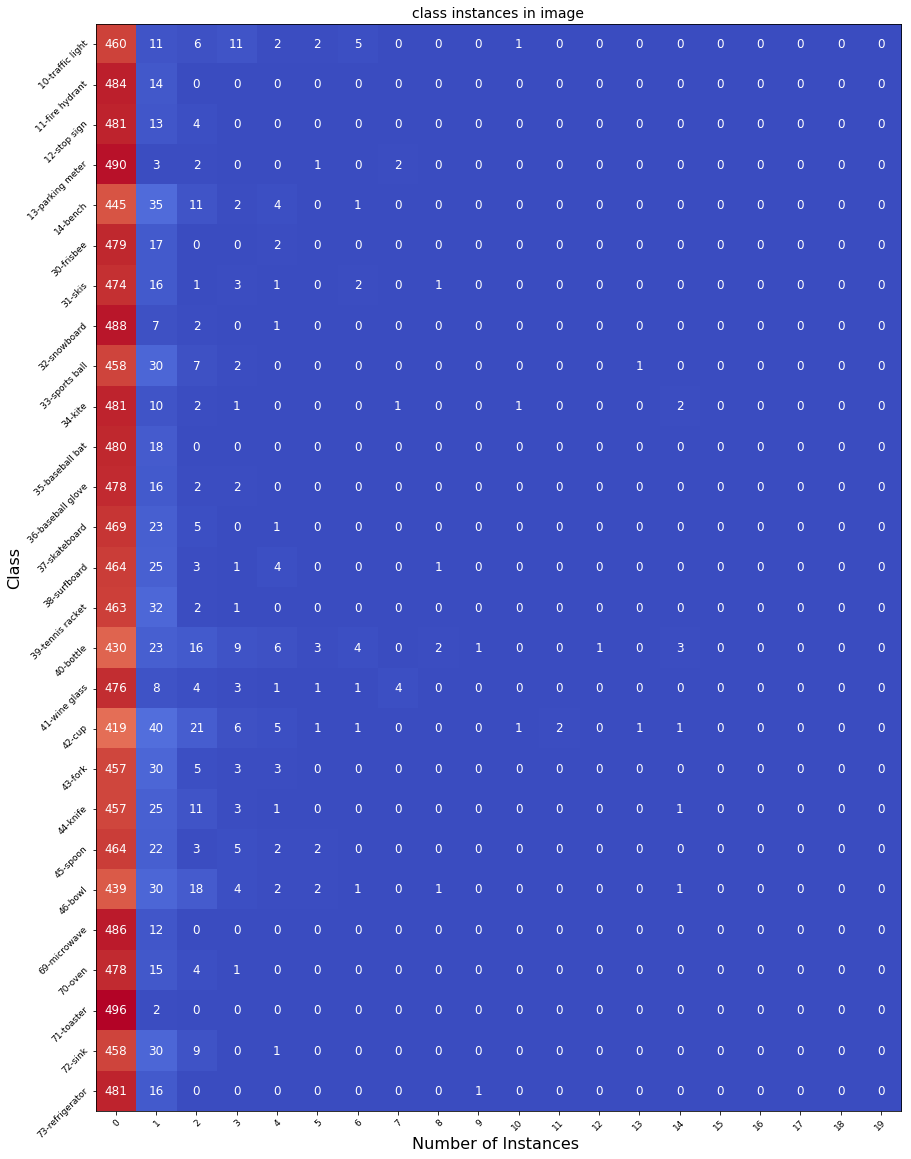

In [25]:
hmfig = vis2.display_pairwise_heatmap(gt_ttl_img_by_inst, CLASS_IDS, CLASS_NAMES)

### mask_rcnn output on all classes

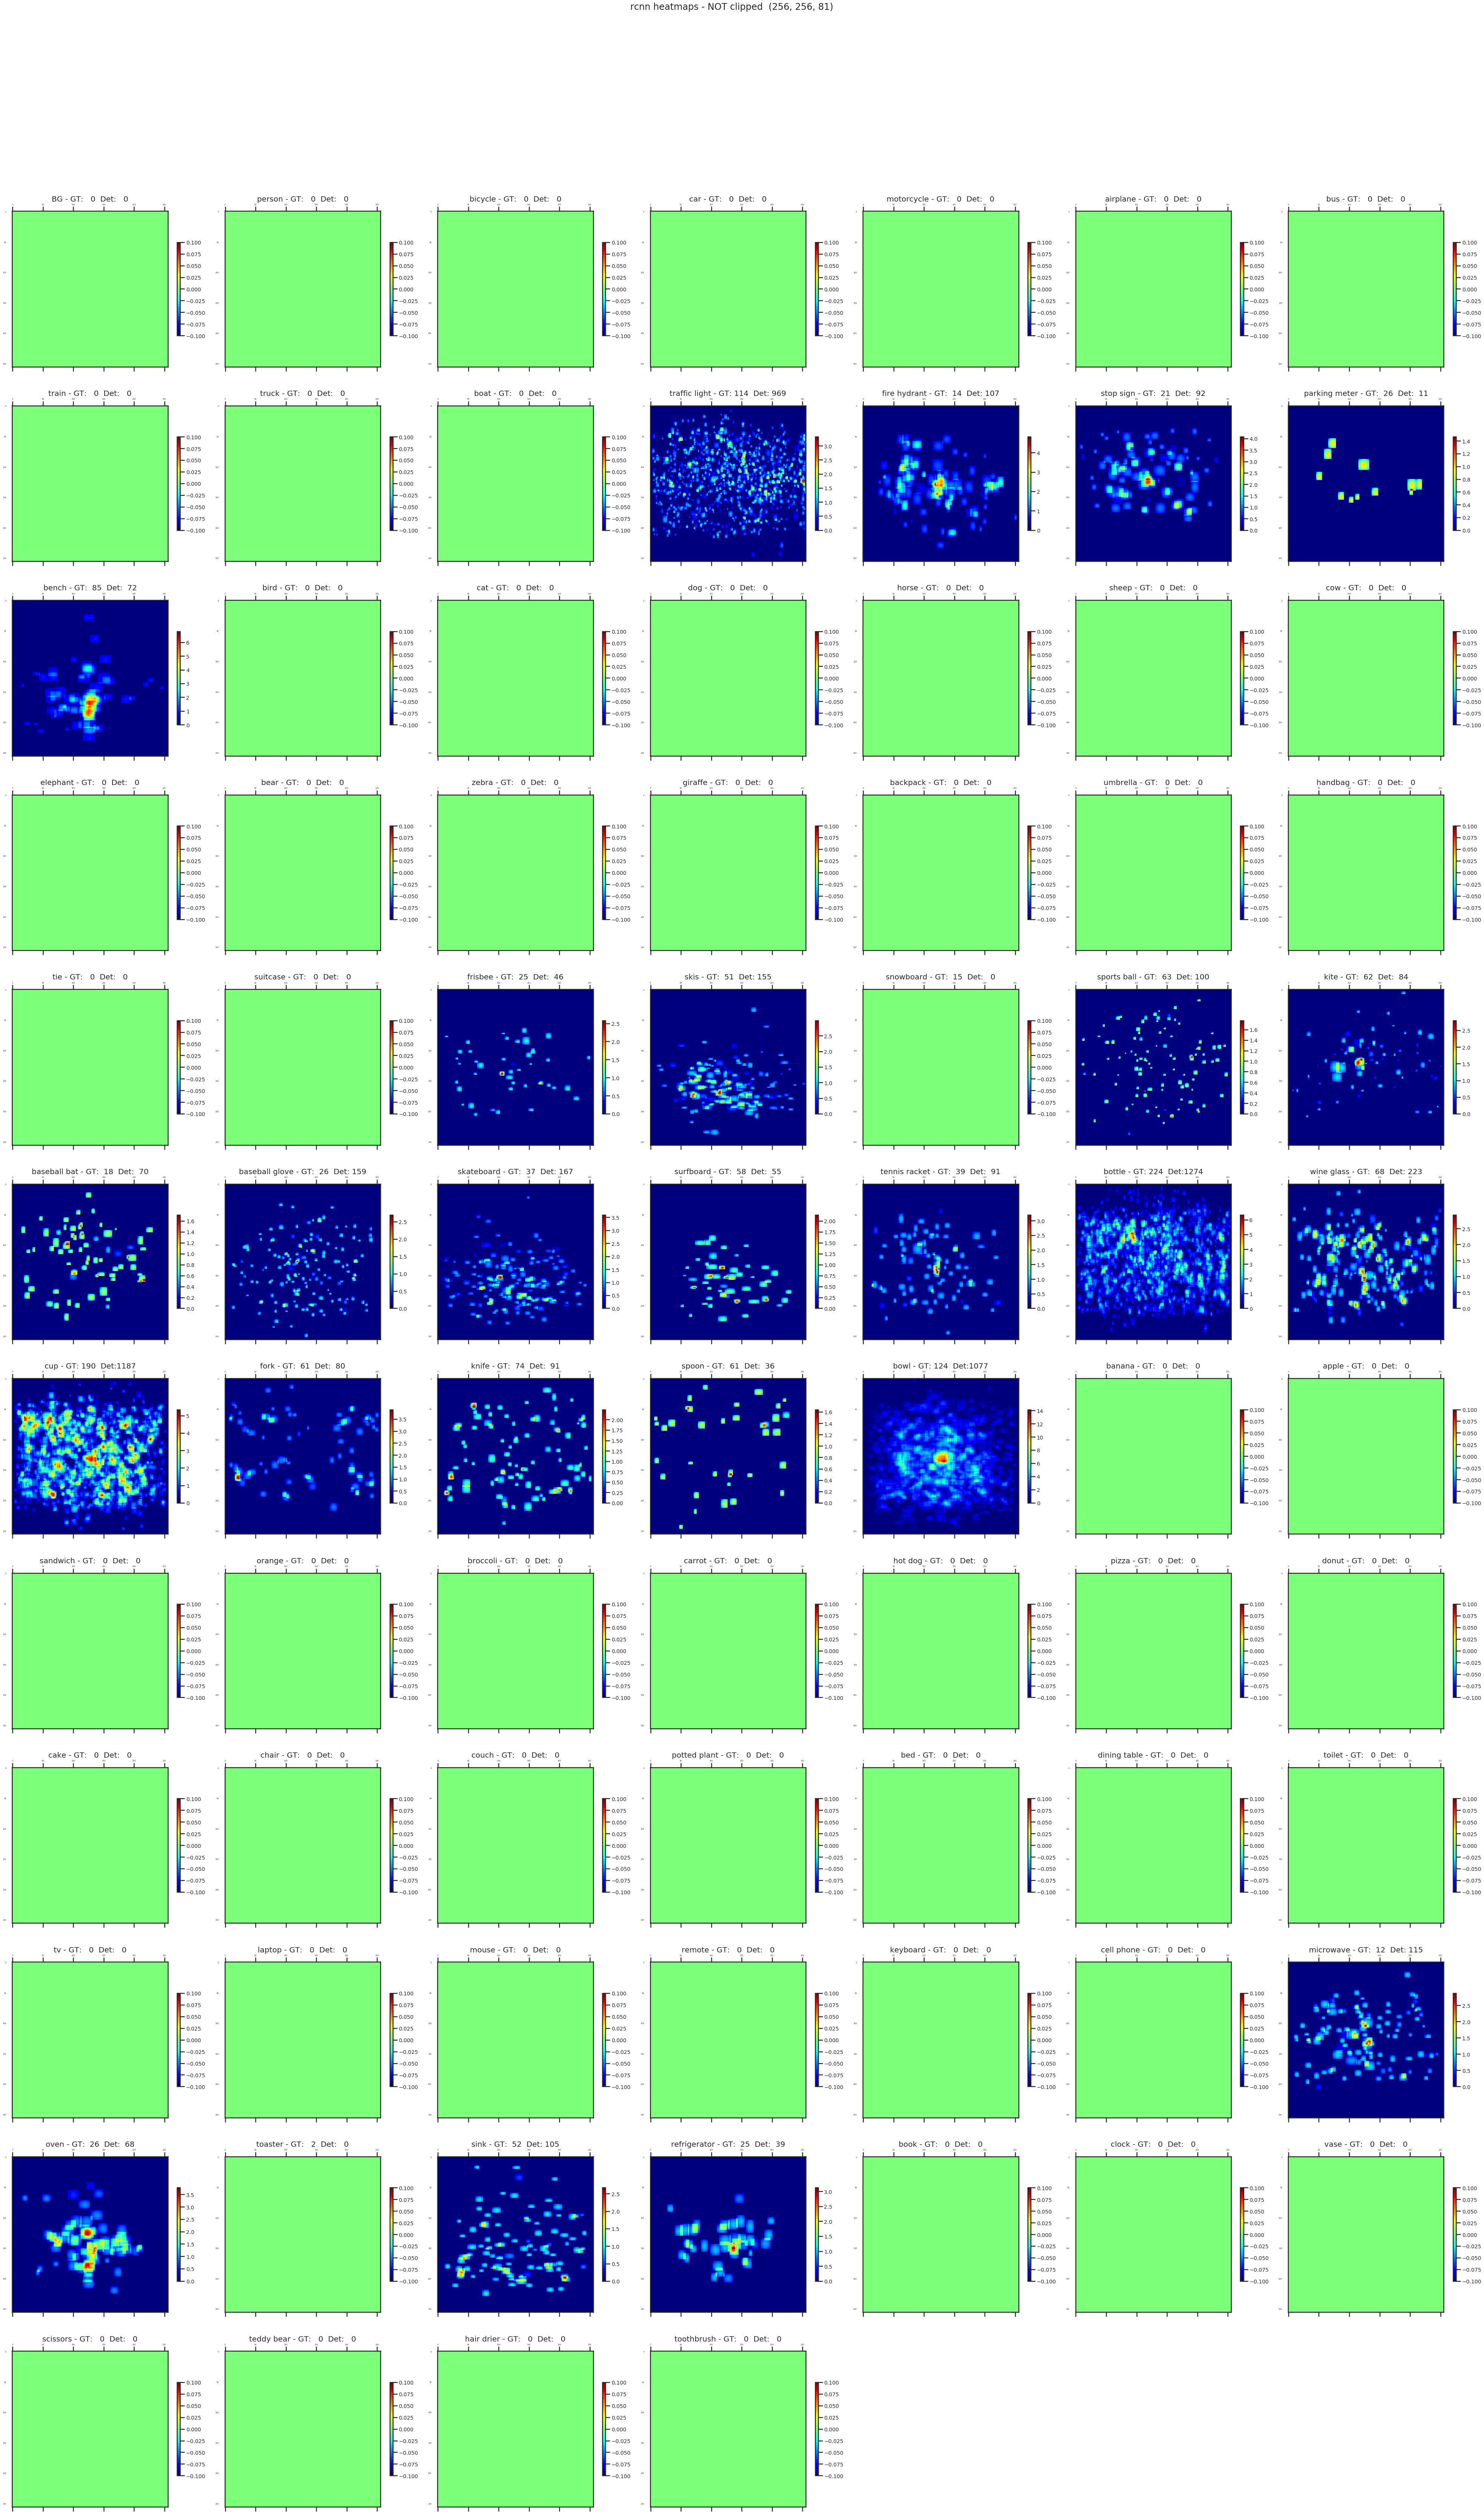

In [20]:
display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT clipped ')

### mask_rcnn output on COCO active classes

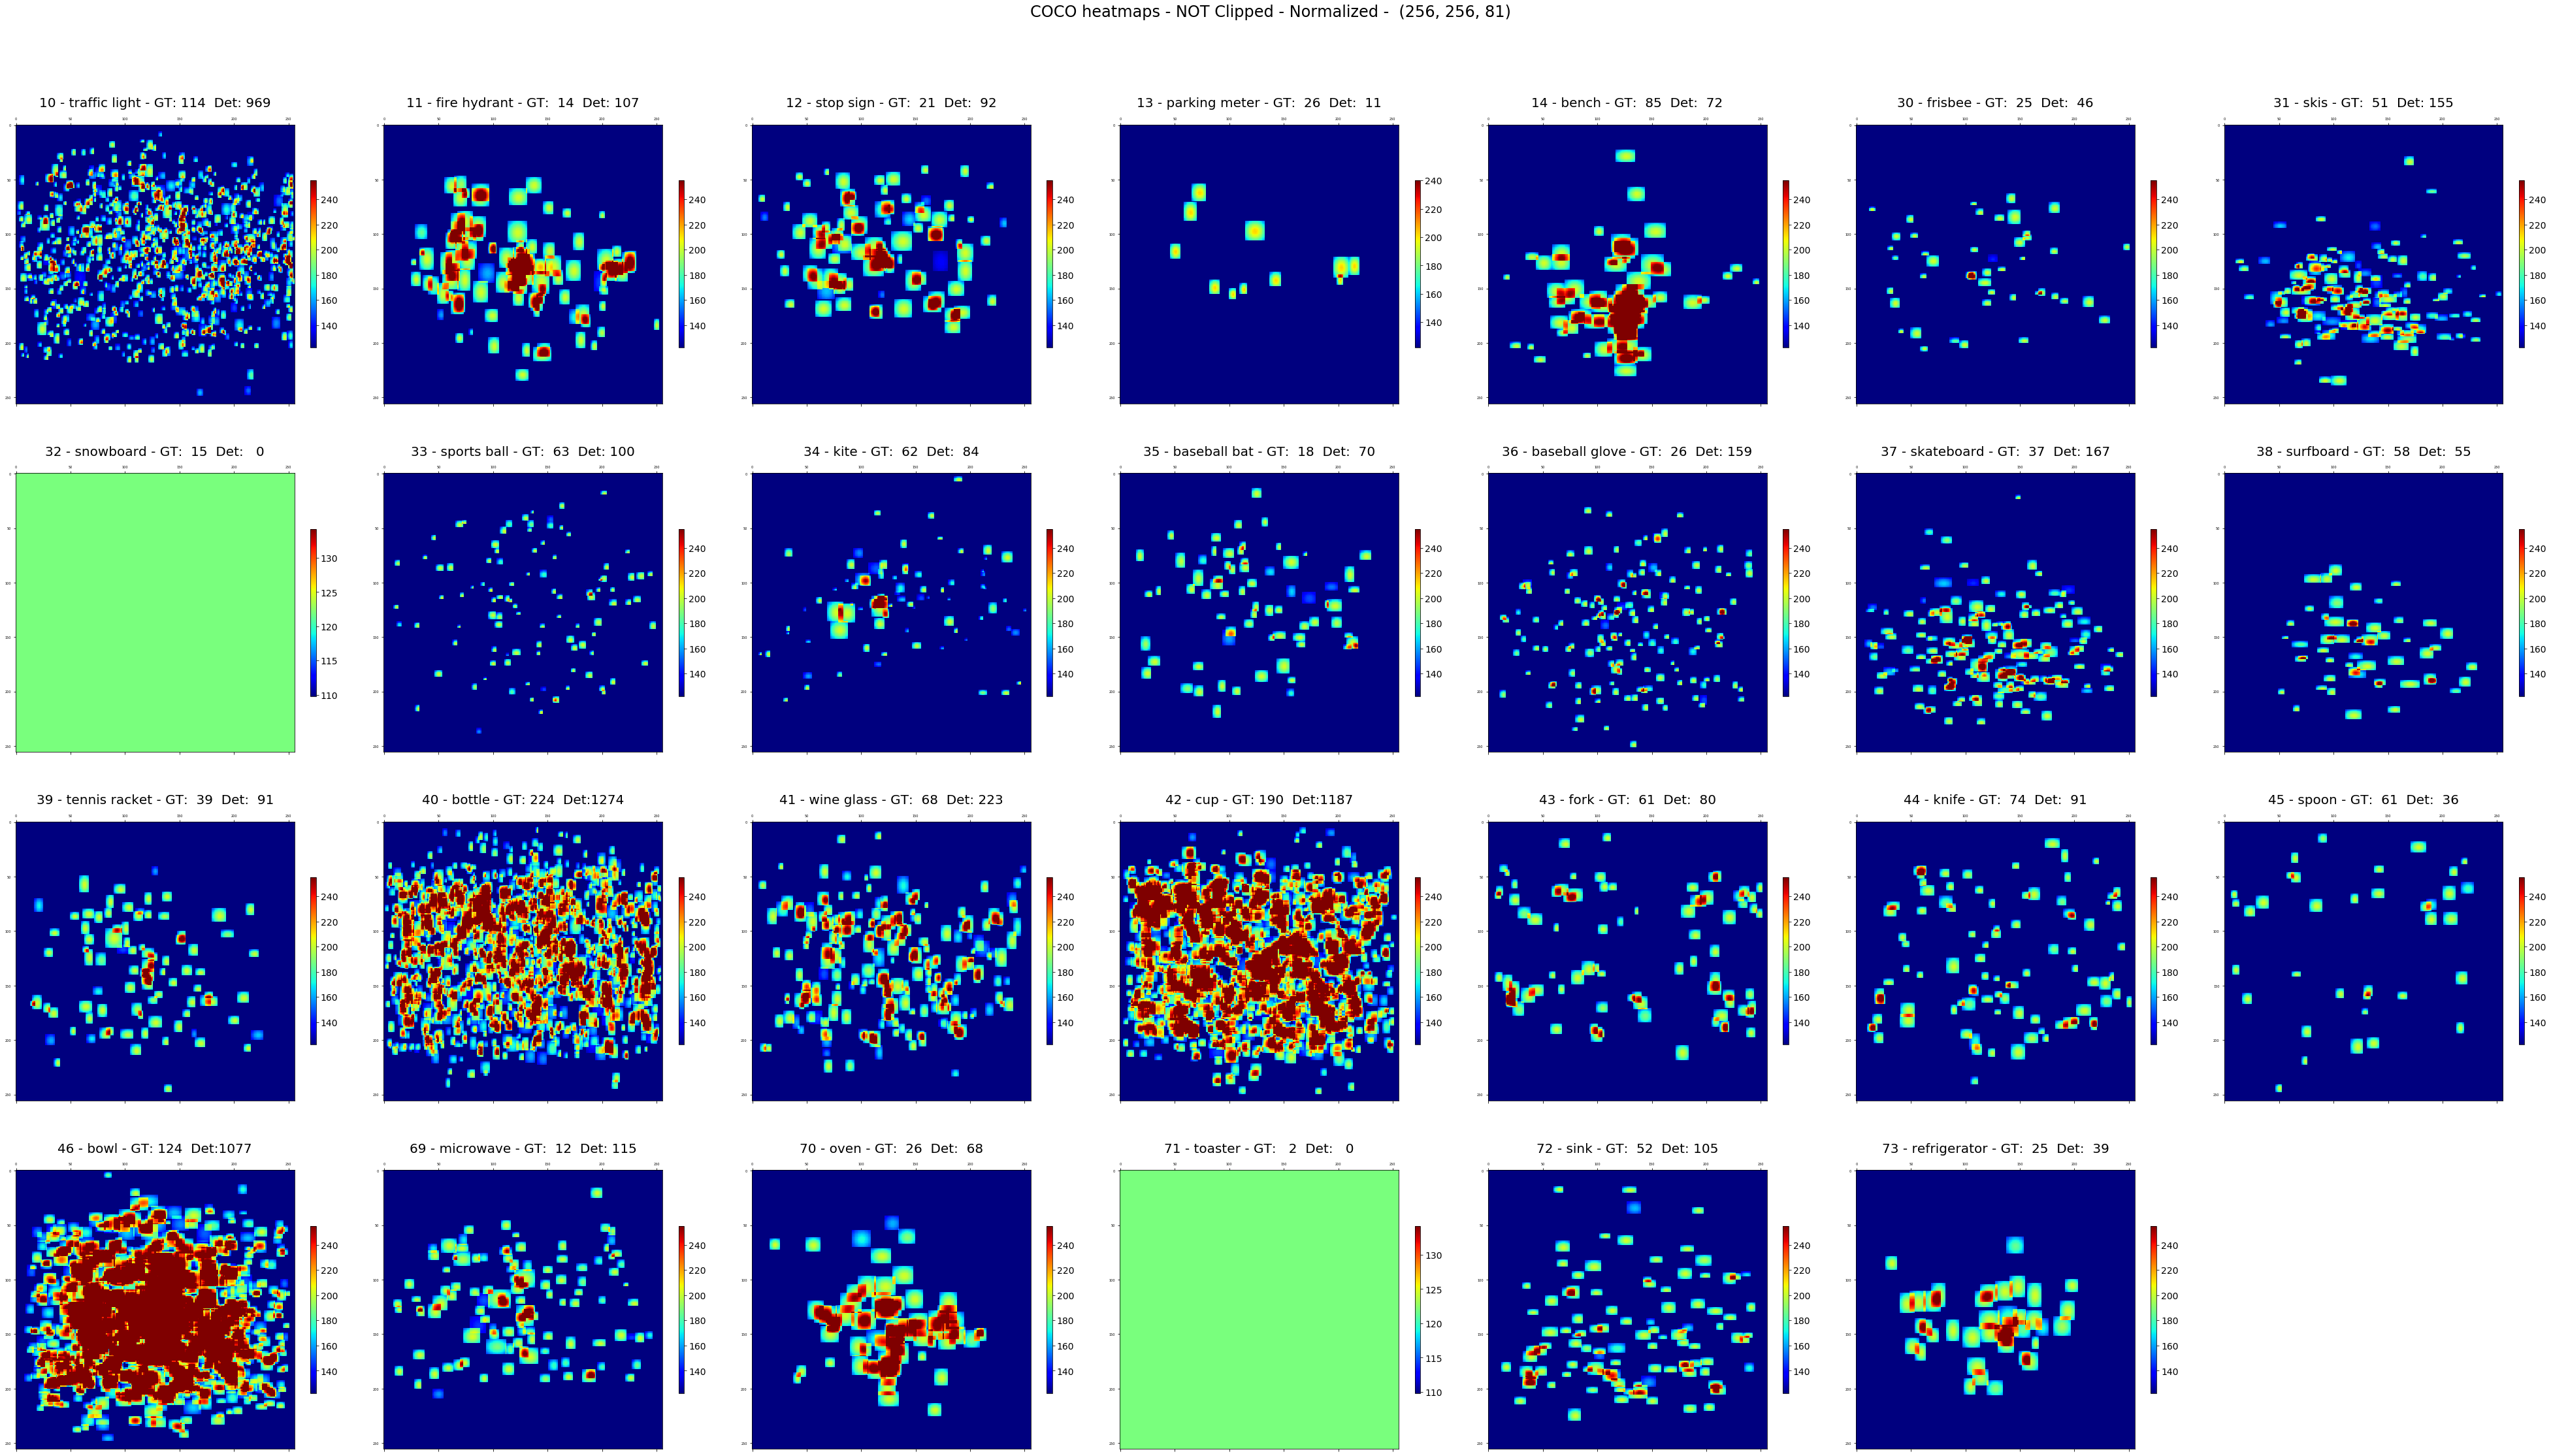

In [31]:
# disp_class_ids = dataset_test.active_class_ids
display_fcn_input(deprocess_image(pr_agg_hm), gt_cls_counts, dt_cls_counts, CLASS_IDS, CLASS_NAMES, 
                  cmap = 'jet', columns = 7, title = 'COCO heatmaps - NOT Clipped - Normalized - ')
# display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, features=disp_class_ids, cmap = 'jet', columns = 7, title = 'COCO heatmaps - NOT Clipped - Normalized - ')

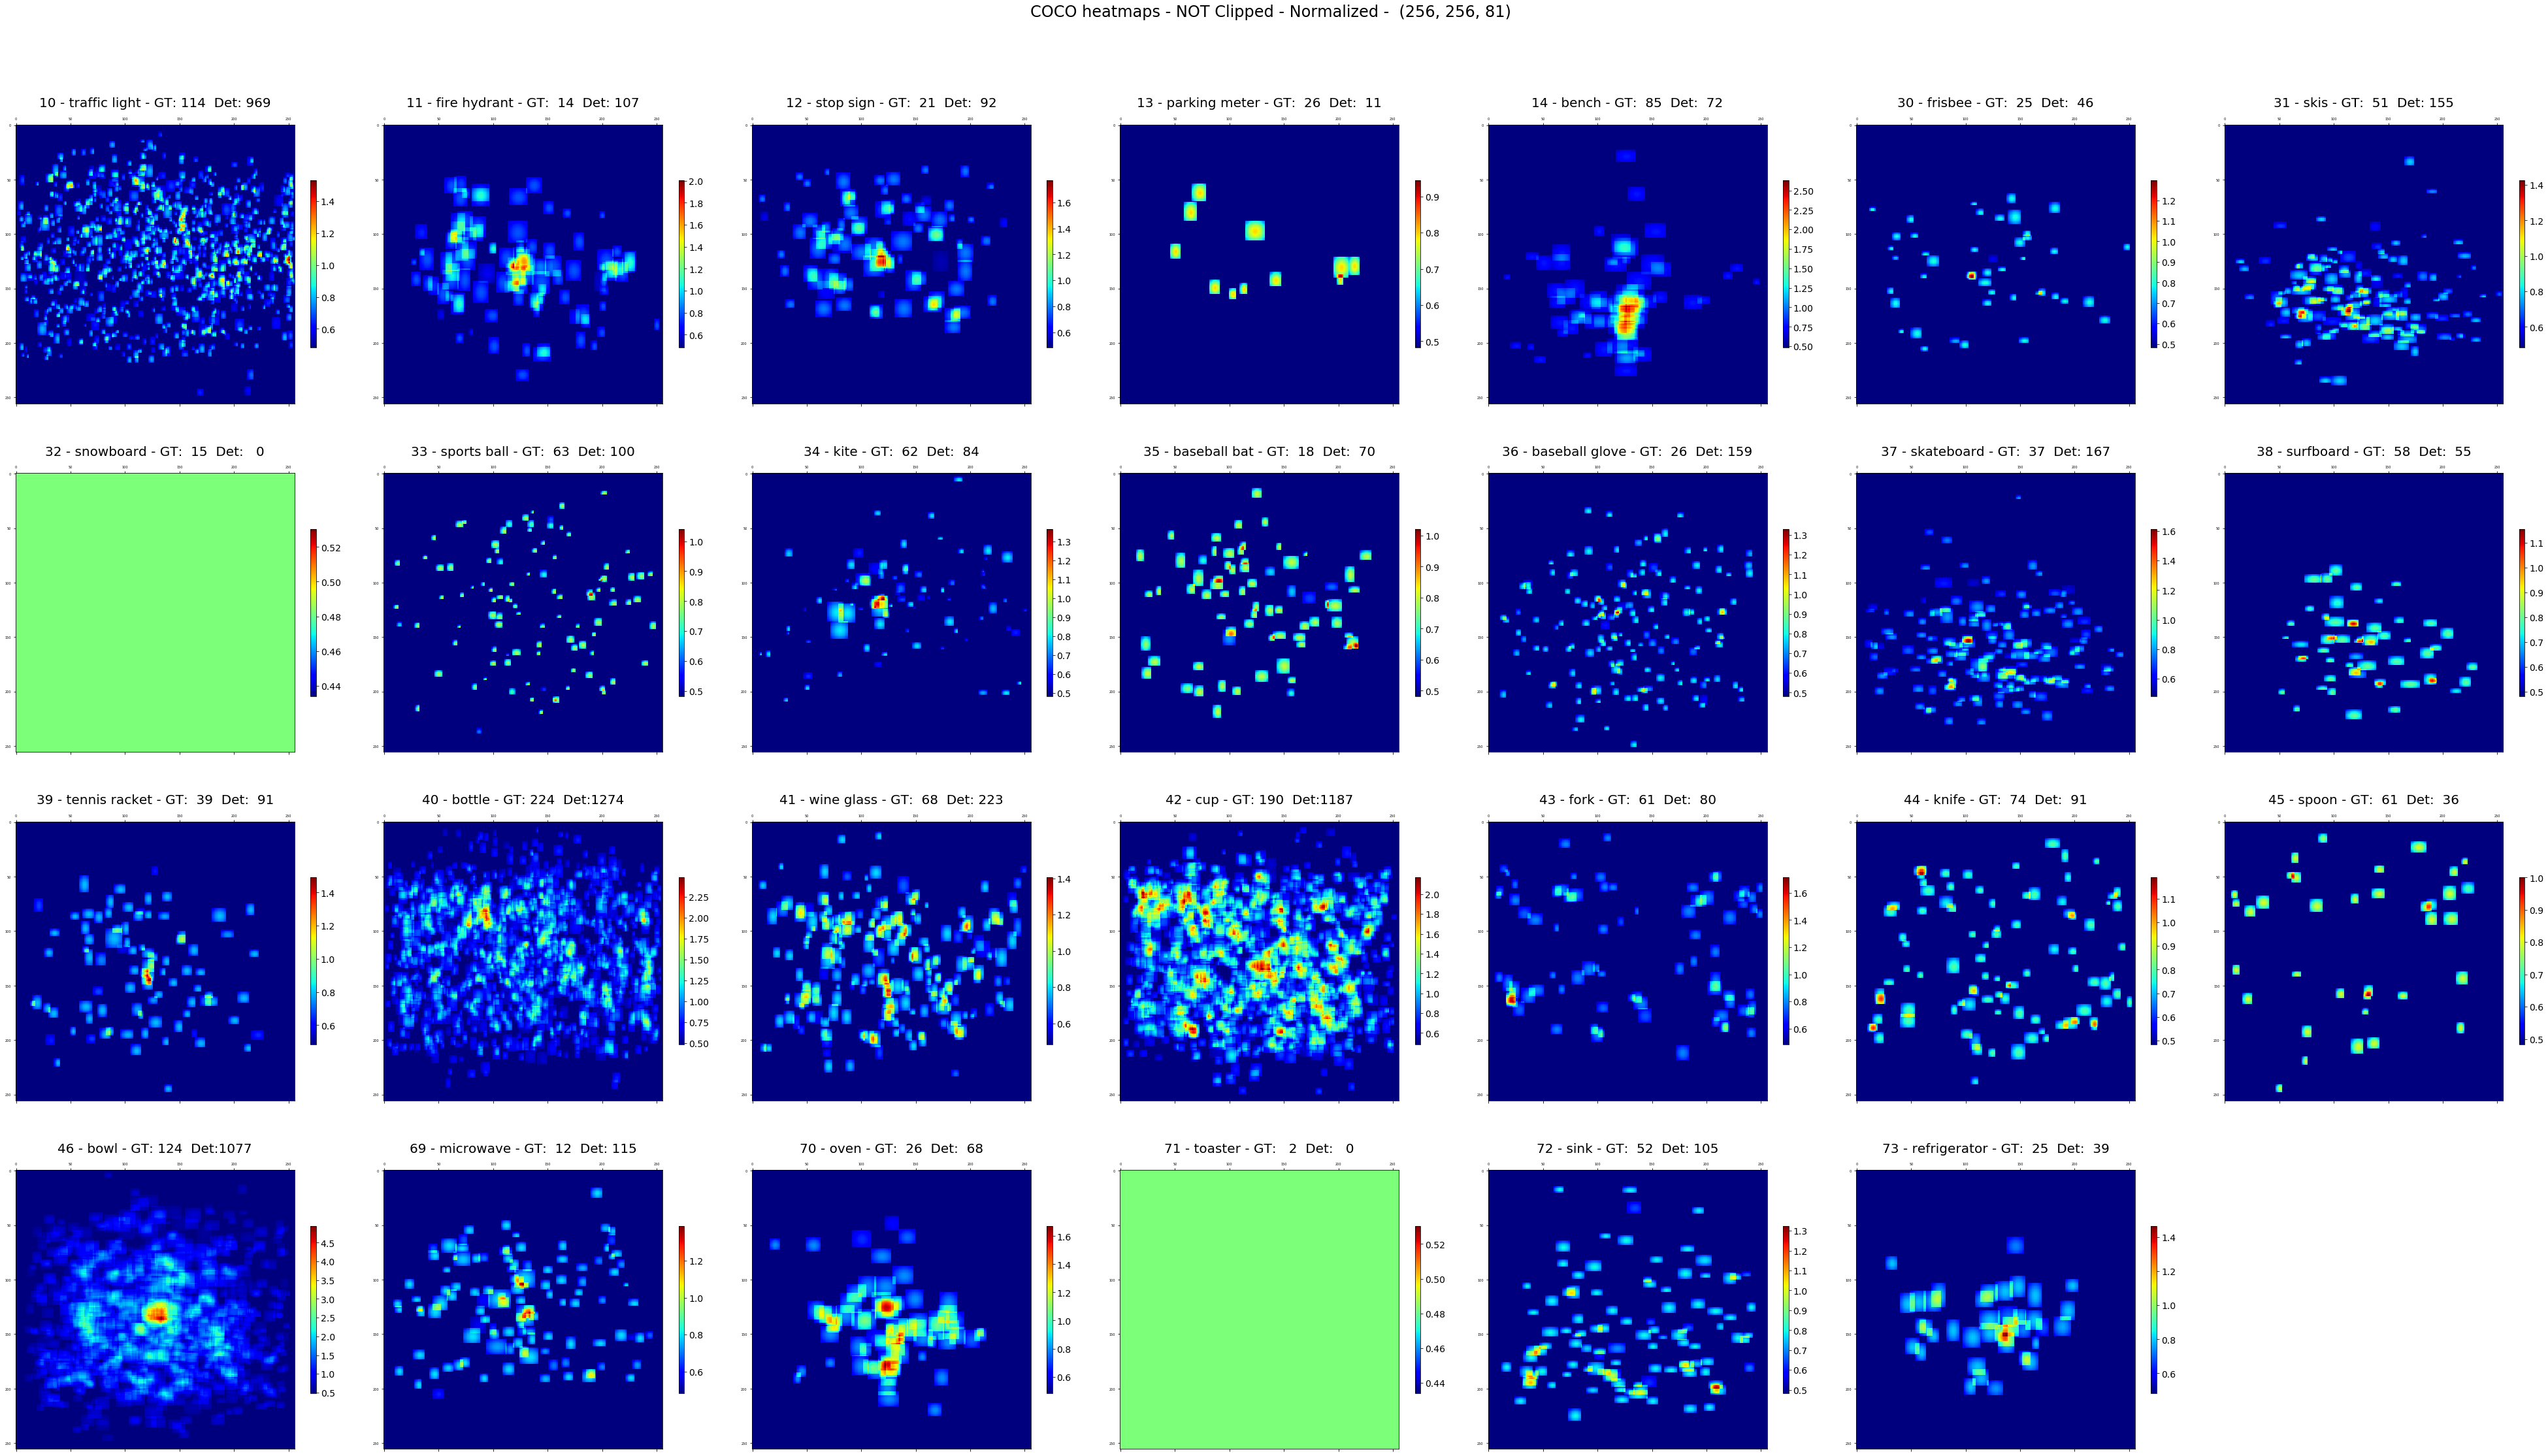

In [32]:
display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, CLASS_IDS, CLASS_NAMES, cmap = 'jet', columns = 7, title = 'COCO heatmaps - NOT Clipped - Normalized - ')
# display_fcn_input(pr_agg_hm, gt_cls_counts, dt_cls_counts, features=disp_class_ids, cmap = 'jet', columns = 7, title = 'COCO heatmaps - NOT Clipped - Normalized - ')

### mask_rcnn output on Shapes active classes

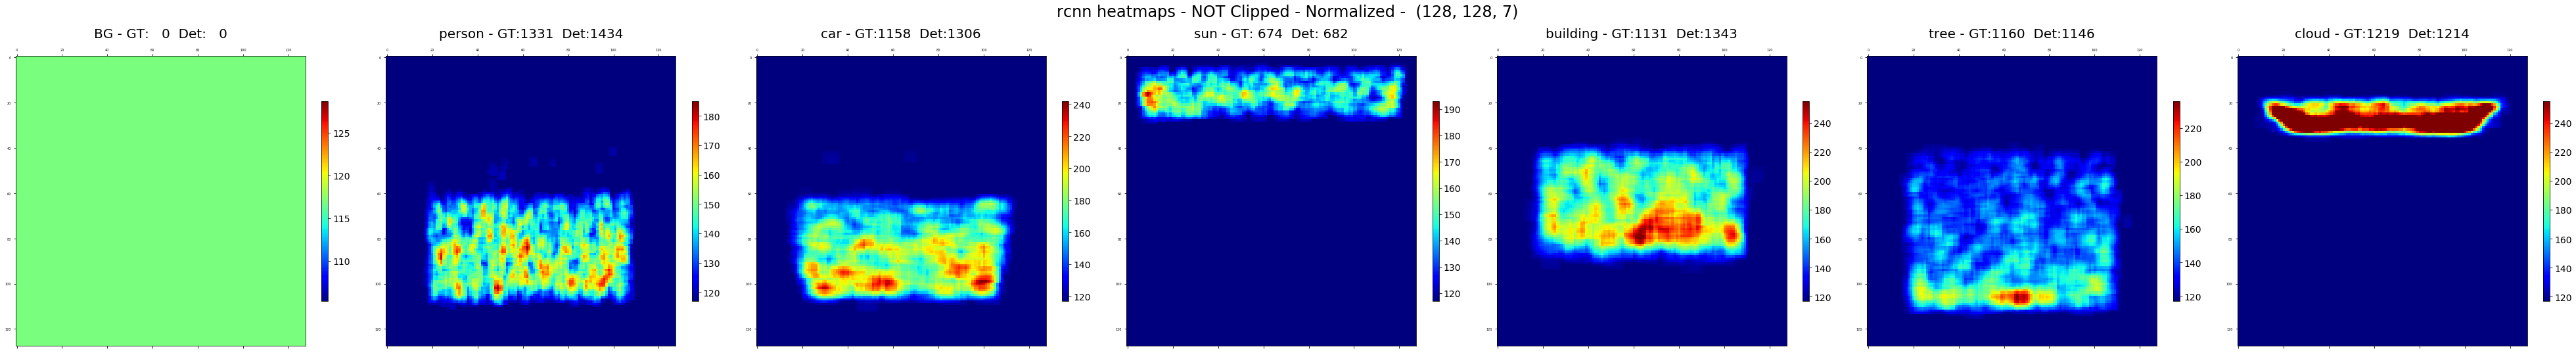

In [19]:
display_fcn_input(deprocess_image(pr_agg_hm), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - NOT Clipped - Normalized - ')

###  mask_rcnn clipped  (same as mask_rcnn output)

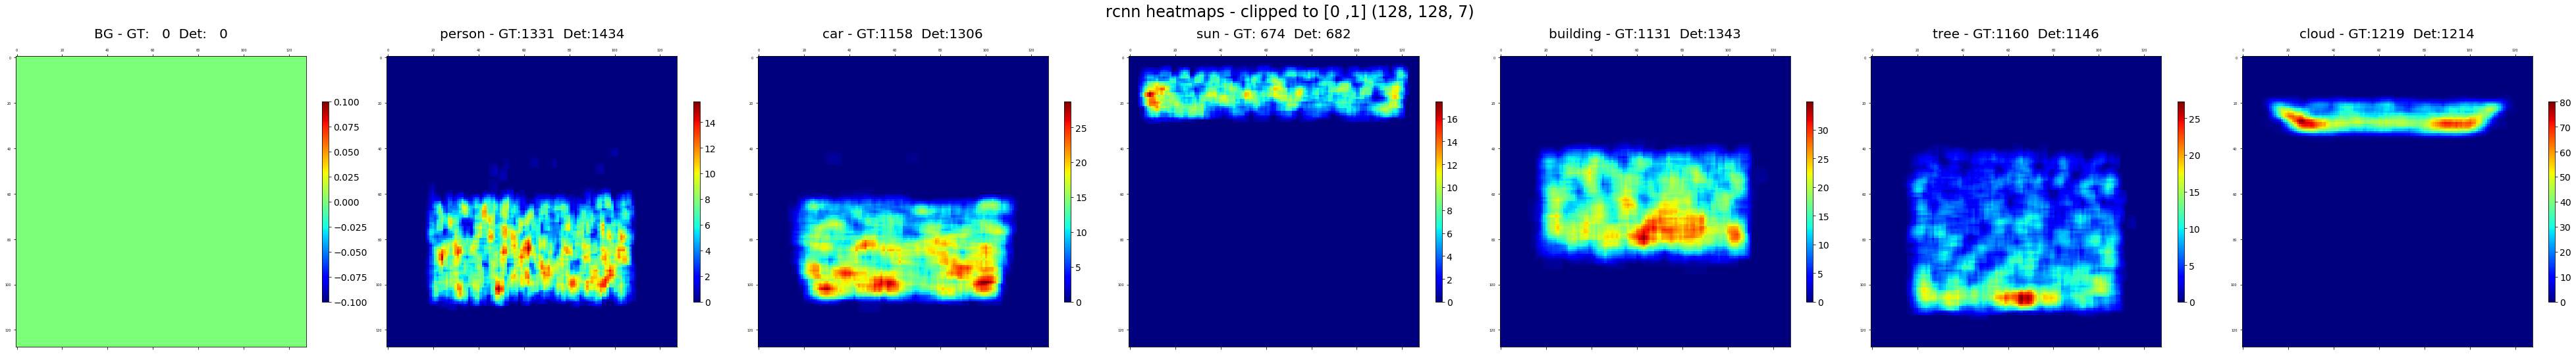

In [20]:
display_fcn_input(pr_agg_hm_clipped, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0 ,1]')

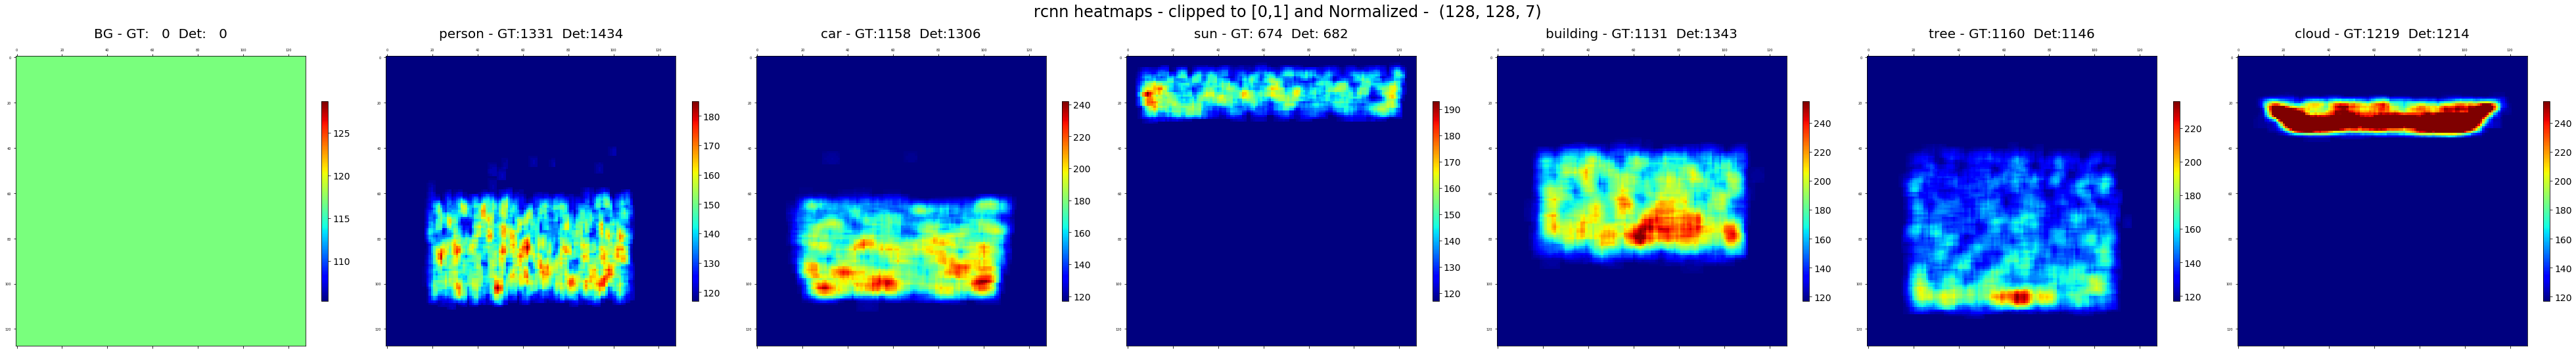

In [21]:
display_fcn_input(deprocess_image(pr_agg_hm_clipped), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'rcnn heatmaps - clipped to [0,1] and Normalized - ')

###  fcn

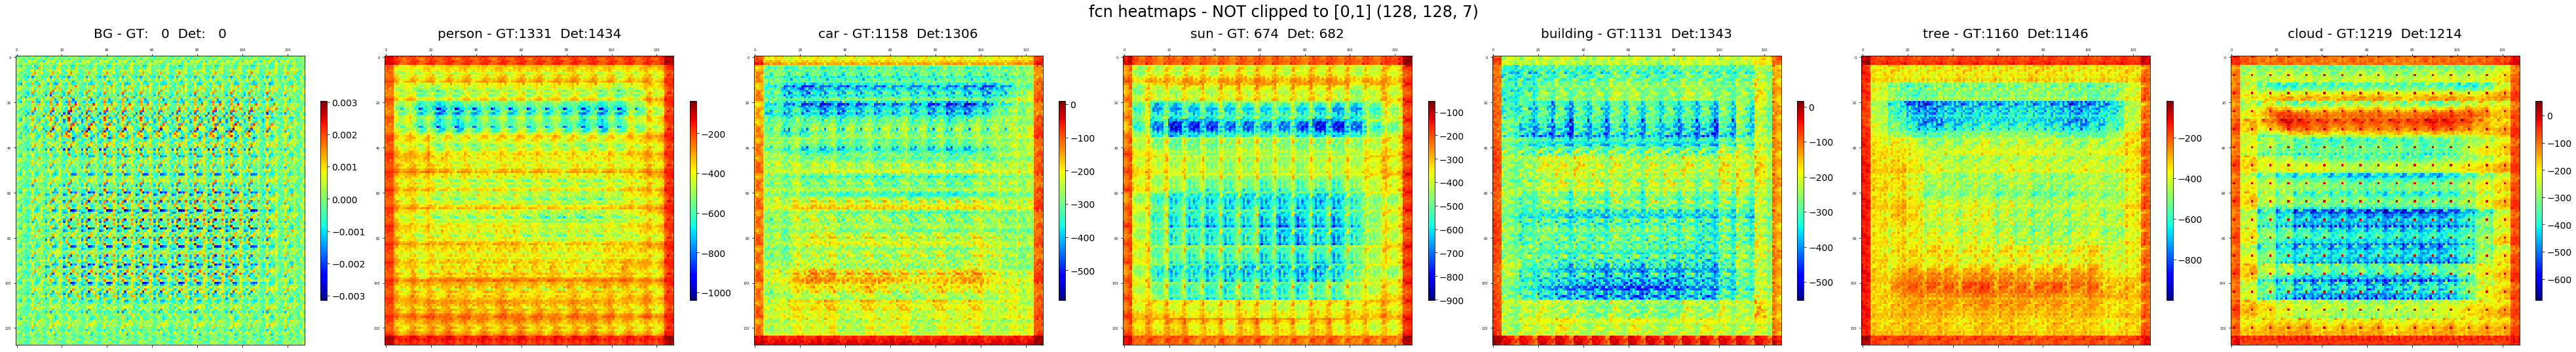

In [34]:
display_fcn_input(fcn_agg_hm, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns =7, title = 'fcn heatmaps - NOT clipped to [0,1]')

### fcn normalized

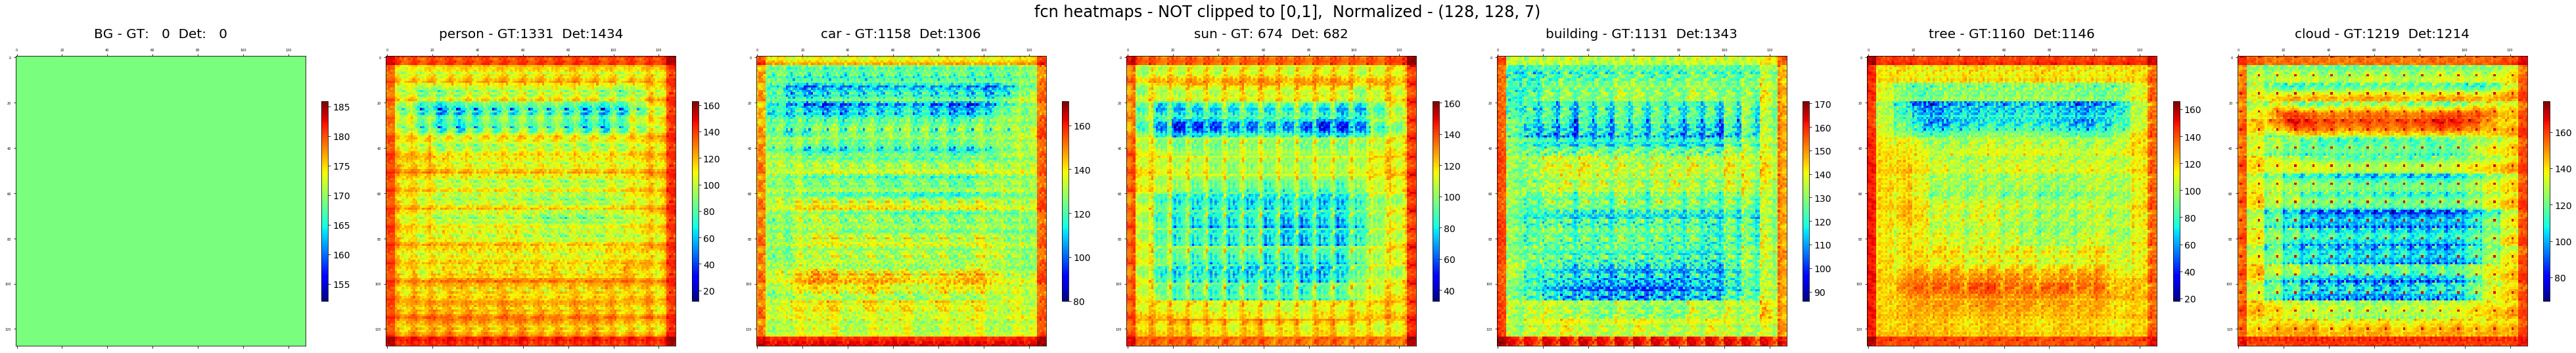

In [35]:
display_fcn_input(deprocess_image(fcn_agg_hm), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'fcn heatmaps - NOT clipped to [0,1],  Normalized -')

### fcn clipped

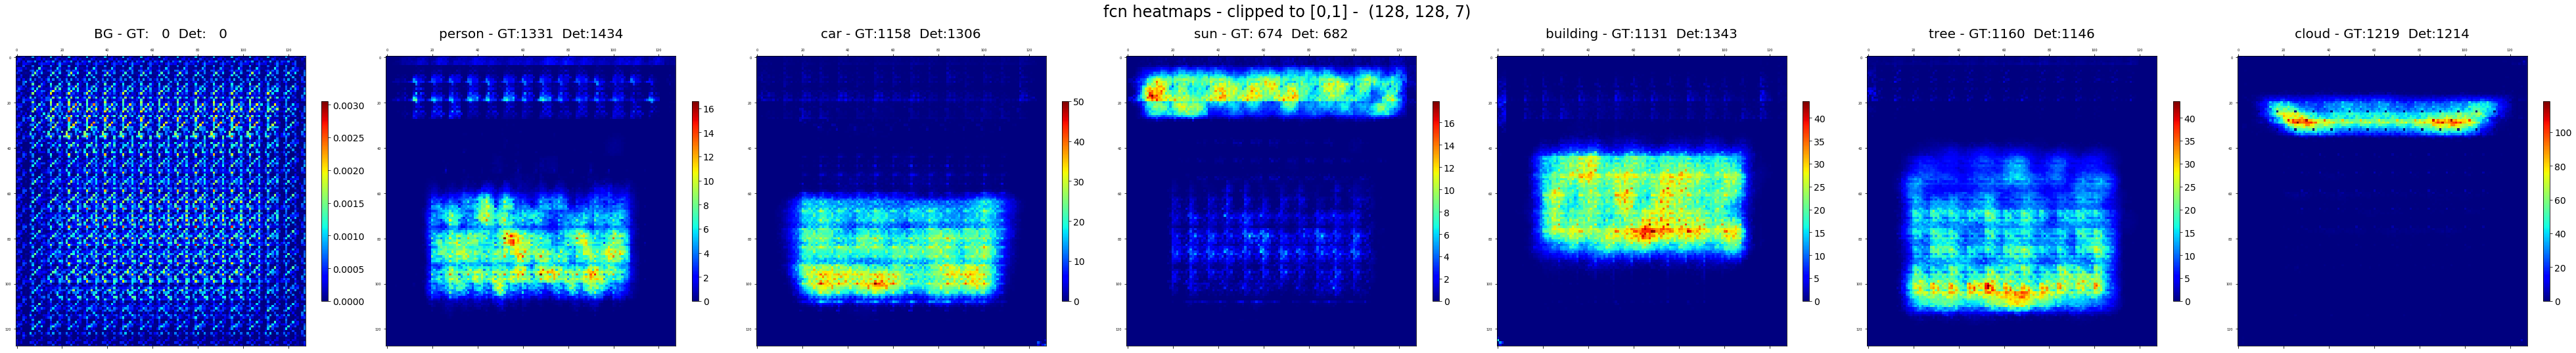

In [36]:
display_fcn_input(fcn_agg_hm_clipped, gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0,1] - ')

### fcn clipped - normalized

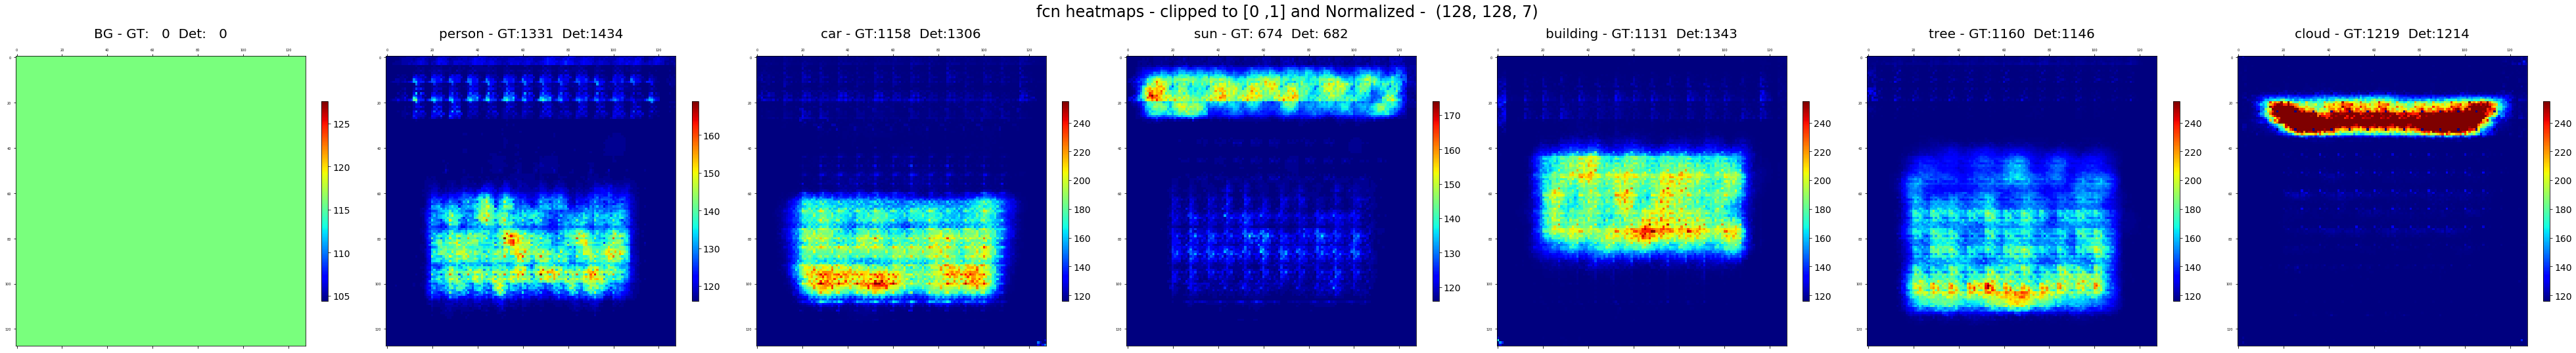

In [37]:
display_fcn_input(deprocess_image(fcn_agg_hm_clipped), gt_cls_counts, dt_cls_counts, cmap = 'jet', columns = 7, title = 'fcn heatmaps - clipped to [0 ,1] and Normalized - ')

### 2D Plots  

####  2D plot of `model_gt_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                          class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

####  2D plot of `pred_heatmap_norm` returned from MRCNN 

In [ ]:
fig = visualize.plot_2d_heatmap(model_pr_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3, 
                            class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_pr_heatmap_scores, img_id, pr_class_ids, columns = 3,
                          class_names = coco_class_names, scale = 4, scaling = 'all')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
fig = visualize.plot_2d_heatmap(model_fcn_heatmap, model_gt_heatmap_scores, img_id,
                                class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

In [ ]:
fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
fig = visualize.plot_2d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, model_pr_heatmap_scores, 
                        img_id, class_ids = pr_class_ids, class_names = coco_class_names, scale = 4, scaling = True )    

###  3D Plots

####  3D plot of  `gt_heatmap_norm` returned form code above

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap(model_gt_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling='class')

####  3D plot of `pred_heatmap_norm` returned form model

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_pr_heatmap, img_id, pr_class_ids, class_names = coco_class_names, zlim = 'class' , scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - only classes in pred_scores

In [ ]:
print(np.max(model_fcn_heatmap), np.min(model_fcn_heatmap))

print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, pr_class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_heatmap` returned form model - all classes

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
#     plot_3d_heatmap(model_fcn_heatmap, img_id, class_ids,class_names = class_names, size = (8,8), zlim=0)
visualize.plot_3d_heatmap(model_fcn_heatmap, img_id, class_names = coco_class_names, columns = 3,scaling = 'all')

####  3D comparative display `pred_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
visualize.plot_3d_heatmap_compare(model_pr_heatmap, model_fcn_heatmap, img_id, class_ids = pr_class_ids, 
                            class_names = coco_class_names, size=(8,8), zlim = 'all' , scaling = 'all')

####  3D comparative display `gt_heatmap` / `fcn_heatmap` 

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_3d_heatmap_compare(model_gt_heatmap, model_fcn_heatmap, img_id, gt_class_ids, class_names = coco_class_names, scaling = 'none')

### Overlay predictions on image

#### Overlay image with gt_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'gt', columns = 3, 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names)

#### Overlay image with pred_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn(mrcnn_input, mrcnn_output, 0, hm = 'pr', columns = 3,
                     config = mrcnn_model.config, class_ids = pr_class_ids, class_names = coco_class_names)

#### Overlay image with fcn_heatmaps

In [ ]:
visualize.display_heatmaps_mrcnn_fcn(mrcnn_input, mrcnn_output, 0, heatmap = model_fcn_heatmap, hm = 'gt', columns = 3,
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'clip')

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: center;
}
</style>
""")

#### Overlay image with gt_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, 
                                   hm = 'gt', config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')

#### Overlay image with pr_heatmaps and fcn_heatmaps

In [ ]:
visualize.display_heatmaps_compare(mrcnn_input, mrcnn_output, heatmap = model_fcn_heatmap, image_id = 0, hm = 'pr', 
                     config = mrcnn_model.config, class_ids = gt_class_ids, class_names = coco_class_names, scaling = 'each')